## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import resample


# Random Forest 
from sklearn.preprocessing import StandardScaler

#XGBoost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

## Reading in the Data

In [2]:
df = pd.read_csv('data/filtered_data.csv')

In [3]:
df

,Unnamed: 0,gameid,GameDate,ab,pitchnum,inning,teambat,balls,strikes,outs,...,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,strikeout_binary
0,8,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,4,4.0,1,1.0,2.0,1.0,...,5.260902,-0.114617,2.546066,115,Colorado Rockies,121,New York Mets,19,Coors Field,1
1,11,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,33,3,4.0,1,0.0,2.0,2.0,...,6.102530,0.880186,1.700091,115,Colorado Rockies,121,New York Mets,19,Coors Field,0
2,30,2021/04/21/pitmlb-detmlb-2,4/21/2021 17:40,45,4,6.0,1,1.0,2.0,0.0,...,-3.835304,-0.239593,2.348037,116,Detroit Tigers,134,Pittsburgh Pirates,2394,Comerica Park,0
3,33,2021/04/25/arimlb-atlmlb-1,4/25/2021 12:20,12,4,2.0,0,1.0,2.0,1.0,...,2.129060,1.028702,2.689594,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park,0
4,38,2021/04/25/arimlb-atlmlb-1,4/25/2021 12:20,12,3,2.0,0,0.0,2.0,1.0,...,13.794325,1.286732,2.807080,144,Atlanta Braves,109,Arizona Diamondbacks,4705,Truist Park,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187400,717544,2023/08/30/clemlb-minmlb-1,8/30/2023 17:10,42,5,6.0,1,1.0,2.0,0.0,...,-3.927244,-0.362439,1.593713,142,Minnesota Twins,114,Cleveland Guardians,3312,Target Field,0
187401,717550,2023/08/30/atlmlb-colmlb-1,8/31/2023 0:40,37,3,5.0,1,0.0,2.0,0.0,...,4.477882,0.436818,1.588252,115,Colorado Rockies,144,Atlanta Braves,19,Coors Field,0
187402,717573,2023/08/30/arimlb-lanmlb-1,8/31/2023 2:10,34,5,4.0,1,1.0,2.0,0.0,...,14.275191,0.586442,1.884596,119,Los Angeles Dodgers,109,Arizona Diamondbacks,22,Dodger Stadium,0
187403,717576,2023/09/02/pitmlb-slnmlb-1,9/2/2023 23:15,54,4,7.0,0,1.0,2.0,0.0,...,14.733393,-0.807034,4.470551,138,St. Louis Cardinals,134,Pittsburgh Pirates,2889,Busch Stadium,0


## Filtering the DataFrame

In [4]:
data = df[["pitcher","pitchname", "pitchresult", "eventtype","spinrate", "relspeed", "horzbreak", "inducedvertbreak", "platelocside", "platelocheight", "strikeout_binary"]].copy()

In [5]:
data = data[data['pitchname'] == 'FF'].copy()

In [6]:
data['eventtype'].unique()

array(['ball', 'foul', 'single', 'field_out', 'grounded_into_double_play',
       'strikeout', 'force_out', 'hit_by_pitch', 'home_run', 'sac_fly',
       'double_play', 'double', 'stolen_base_2b', 'triple', 'sac_bunt',
       'field_error', 'caught_stealing_2b', 'wild_pitch',
       'defensive_indiff', 'passed_ball', 'fielders_choice_out',
       'pickoff_caught_stealing_2b', 'stolen_base_3b', 'fielders_choice',
       'swinging_strike', 'caught_stealing_home', 'strikeout_double_play',
       'catcher_interf', 'stolen_base_home', 'pickoff_attempt_1b',
       'sac_fly_double_play', 'pickoff_attempt_3b', 'pickoff_3b',
       'caught_stealing_3b', 'pickoff_attempt_2b', 'pickoff_1b',
       'triple_play'], dtype=object)

In [7]:
data = data[~data['eventtype'].isin(['field_out'])]
data

,pitcher,pitchname,pitchresult,eventtype,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,strikeout_binary
4,"Wilson, Bryse",FF,B,ball,2143.301025,94.614914,3.280700,13.794325,1.286732,2.807080,0
10,"Houck, Tanner",FF,F,foul,2164.971191,96.171303,9.286347,7.589095,0.122586,2.129726,0
13,"Barnes, Jacob",FF,D,single,2254.785645,93.305214,-2.640007,12.777637,0.605103,2.710316,0
17,"Houck, Tanner",FF,X,grounded_into_double_play,2082.749023,94.901627,8.153946,6.207467,-0.378895,3.240144,0
23,"Yajure, Miguel",FF,B,ball,2465.145264,90.507637,5.920645,17.932449,-0.729870,4.935426,0
...,...,...,...,...,...,...,...,...,...,...,...
187398,"Alcantara, Sandy",FF,E,home_run,2341.313232,99.597092,13.290255,14.944304,-0.707683,3.001816,0
187399,"Karinchak, James",FF,S,strikeout,2320.230225,94.827782,5.813662,19.101568,-0.477500,4.648829,1
187402,"Pfaadt, Brandon",FF,D,single,2501.821533,94.116440,3.854095,14.275191,0.586442,1.884596,0
187403,"Gallegos, Giovanny",FF,B,ball,2398.320557,93.521347,10.798670,14.733393,-0.807034,4.470551,0


In [8]:
# Filter the DataFrame to only include the specified event types
data = data[data['eventtype'].isin(['strikeout', 'strikeout_double_play', 'ball', 'passed ball'])]

# Display the filtered DataFrame
data

,pitcher,pitchname,pitchresult,eventtype,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,strikeout_binary
4,"Wilson, Bryse",FF,B,ball,2143.301025,94.614914,3.280700,13.794325,1.286732,2.807080,0
23,"Yajure, Miguel",FF,B,ball,2465.145264,90.507637,5.920645,17.932449,-0.729870,4.935426,0
25,"Gallen, Zac",FF,C,strikeout,2502.240234,94.112892,2.462363,18.226583,0.433979,2.300865,1
28,"Gallen, Zac",FF,B,ball,2279.994873,93.585281,-1.456755,15.130465,1.187537,4.382577,0
40,"Gray, Jon",FF,C,strikeout,2257.527588,96.098084,9.364018,18.195126,-0.346139,1.675238,1
...,...,...,...,...,...,...,...,...,...,...,...
187389,"Morgan, Elijah",FF,B,ball,2392.856689,93.460281,8.608335,18.574152,0.423201,4.239380,0
187393,"Rodriguez, Grayson",FF,S,strikeout,2335.519287,96.947289,14.011564,14.445724,-0.744582,4.062359,1
187399,"Karinchak, James",FF,S,strikeout,2320.230225,94.827782,5.813662,19.101568,-0.477500,4.648829,1
187403,"Gallegos, Giovanny",FF,B,ball,2398.320557,93.521347,10.798670,14.733393,-0.807034,4.470551,0


In [9]:
data['eventtype'].value_counts()

eventtype
ball                     30123
strikeout                14151
strikeout_double_play       13
Name: count, dtype: int64

### Looking at outliers

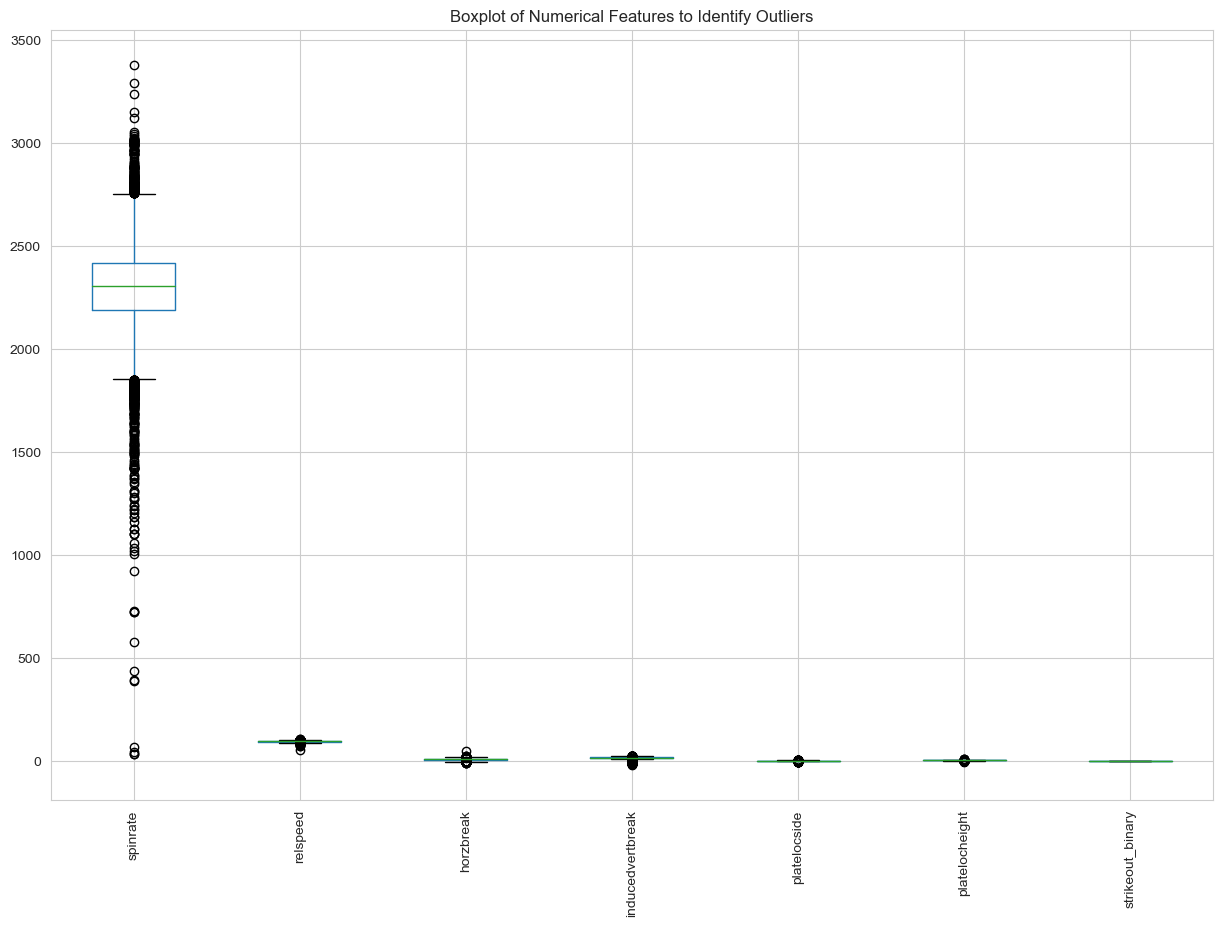

In [10]:
numerical_features = data.select_dtypes(include=[np.number]).columns
numerical_data = data[numerical_features]

# Plot boxplots for numerical features to visualize outliers
plt.figure(figsize=(15, 10))
numerical_data.boxplot(rot=90)
plt.title('Boxplot of Numerical Features to Identify Outliers')
plt.show()

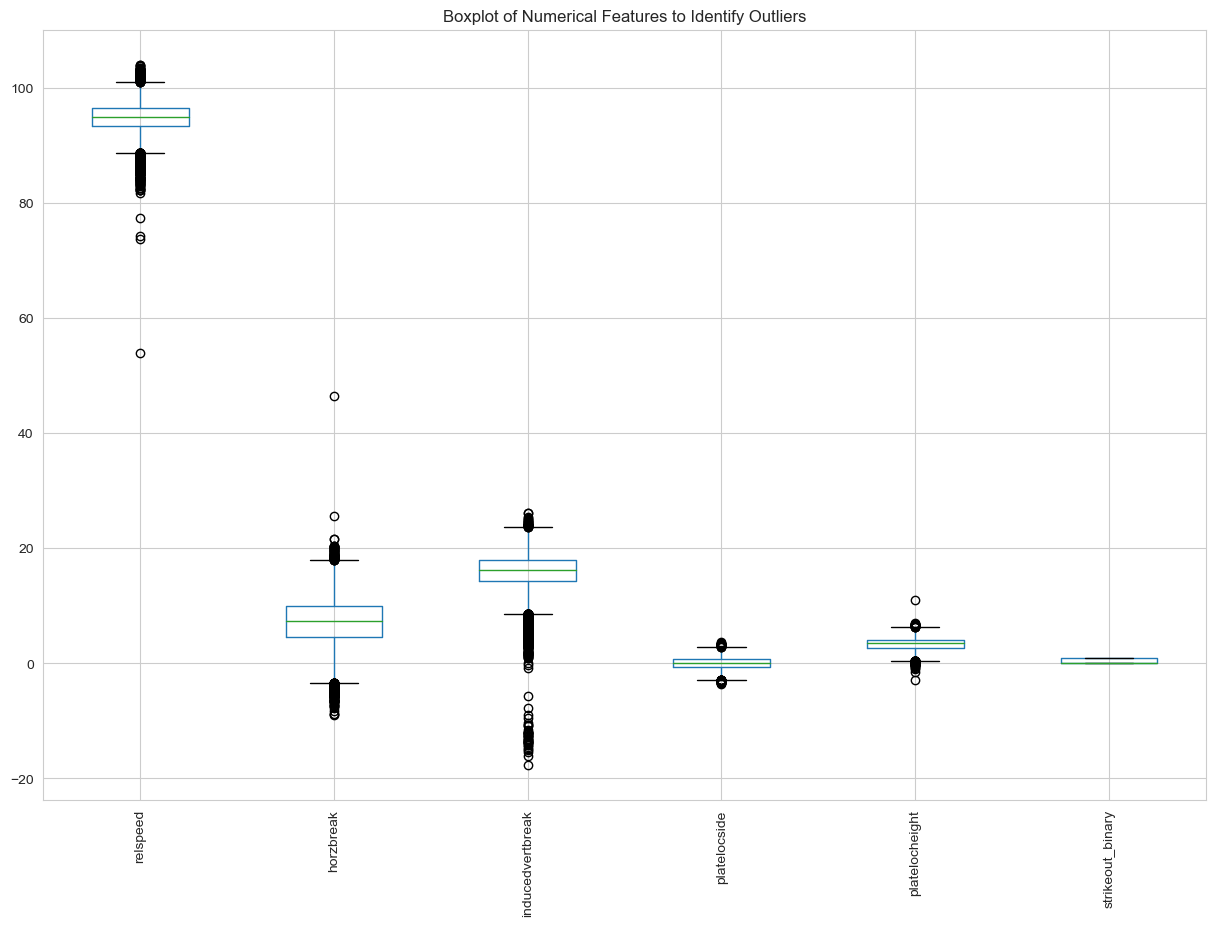

In [11]:
# Select numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns
numerical_data = data[numerical_features]
numerical_data = data[[col for col in numerical_features if col != 'spinrate']]

# Plot boxplots for numerical features to visualize outliers
plt.figure(figsize=(15, 10))
numerical_data.boxplot(rot=90)
plt.title('Boxplot of Numerical Features to Identify Outliers')
plt.show()

In [12]:
# numerical_data = data[numerical_features]
# 
# # Function to remove outliers using the IQR method
# def remove_outliers_iqr(data, columns, threshold=100):
#     cleaned_data = data.copy()
#     for column in columns:
#         Q1 = cleaned_data[column].quantile(0.25)
#         Q3 = cleaned_data[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - threshold * IQR
#         upper_bound = Q3 + threshold * IQR
#         # Remove rows with outliers
#         cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
#     return cleaned_data
# 
# # Remove outliers from the numerical features
# cleaned_data = remove_outliers_iqr(numerical_data, numerical_features)
# 
# # Display the shape of the dataset before and after removing outliers
# original_shape = numerical_data.shape
# cleaned_shape = cleaned_data.shape
# 
# original_shape, cleaned_shape

In [13]:
# Function to remove outliers using the IQR method for a given dataset
def remove_outliers_iqr_classwise(data, columns, threshold=1.5):
    cleaned_data = data.copy()
    for column in columns:
        Q1 = cleaned_data[column].quantile(0.25)
        Q3 = cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        # Remove rows with outliers
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    return cleaned_data

# Separate the data into classes
strikeout_data = data[data['strikeout_binary'] == 1]
non_strikeout_data = data[data['strikeout_binary'] == 0]

# Remove outliers separately for each class
strikeout_data_cleaned = remove_outliers_iqr_classwise(strikeout_data, numerical_features)
non_strikeout_data_cleaned = remove_outliers_iqr_classwise(non_strikeout_data, numerical_features)

# Concatenate the cleaned data from both classes
cleaned_data_classwise = pd.concat([strikeout_data_cleaned, non_strikeout_data_cleaned])

# Check the distribution of the target variable in the cleaned dataset
strikeout_distribution_classwise = cleaned_data_classwise['strikeout_binary'].value_counts()
strikeout_distribution_classwise


strikeout_binary
0    28279
1    13350
Name: count, dtype: int64

### Looking @ histograms of features in nonstrike/strike scenarios:
- I don't think spinrate, release speed, or horz break on their own have meaningful differences
- I'm going to try combining vertical break & release speed 
- I think platelocside and platelocheight are going to be the most important 


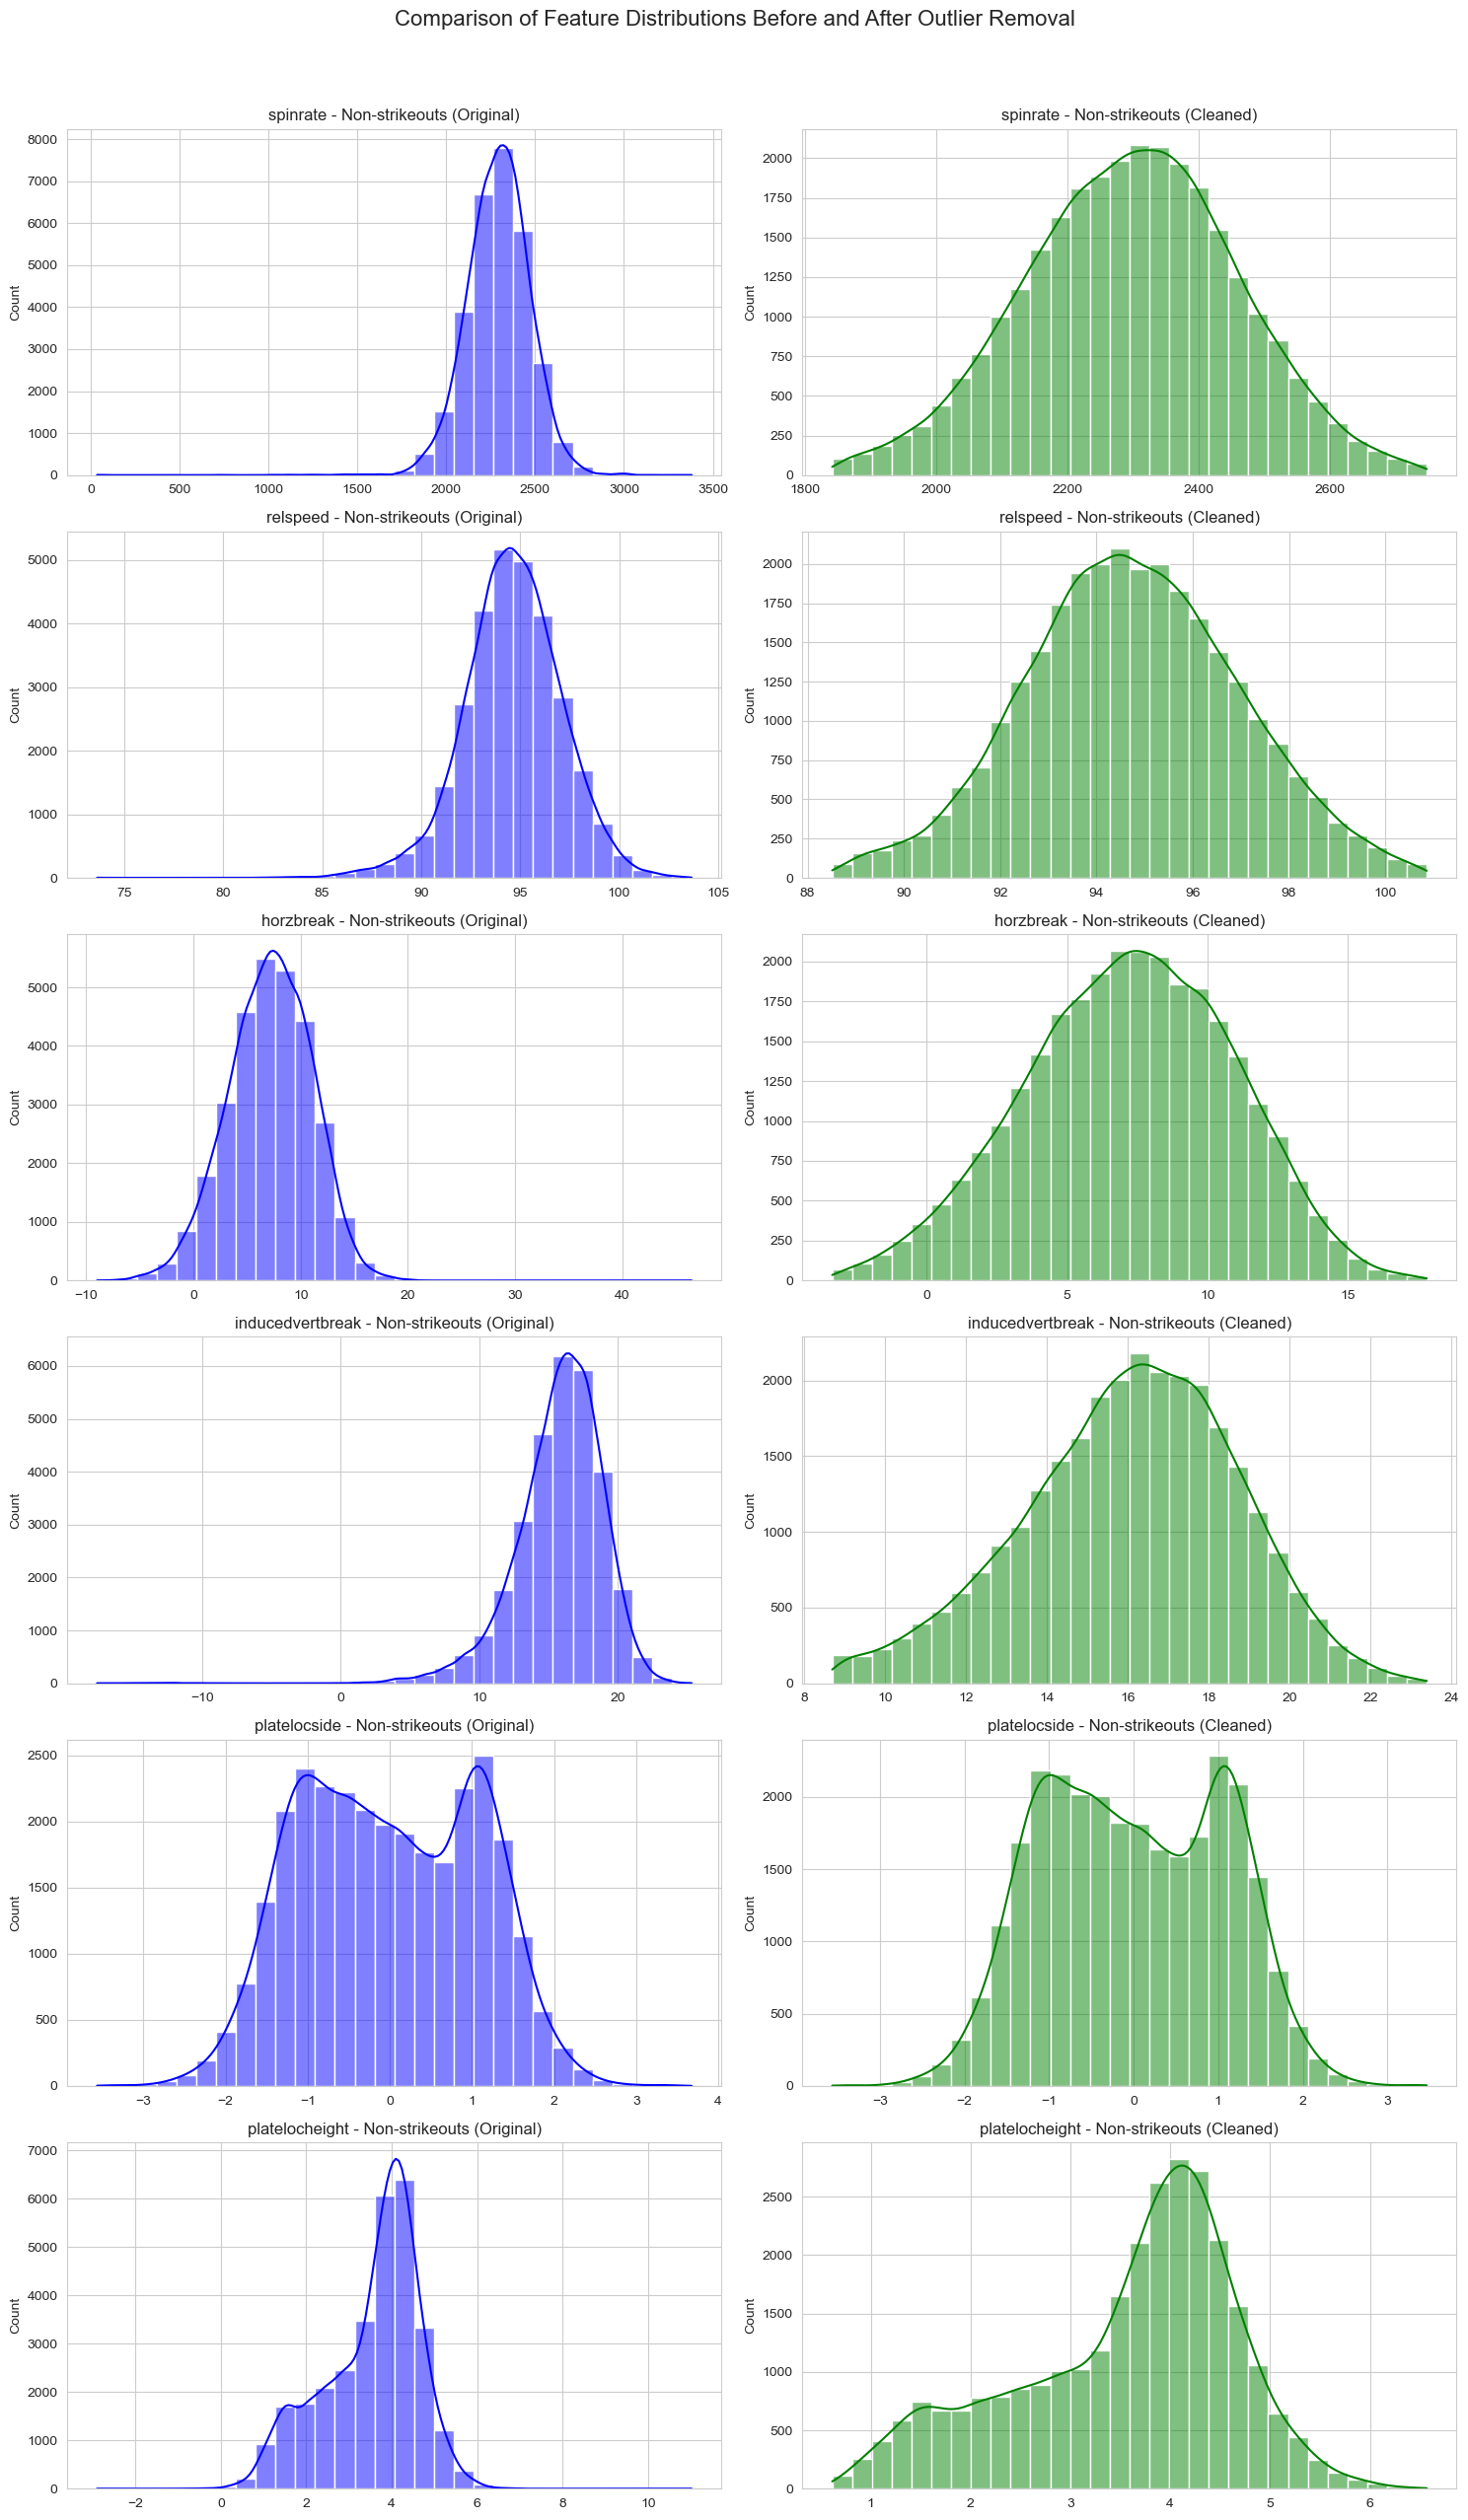

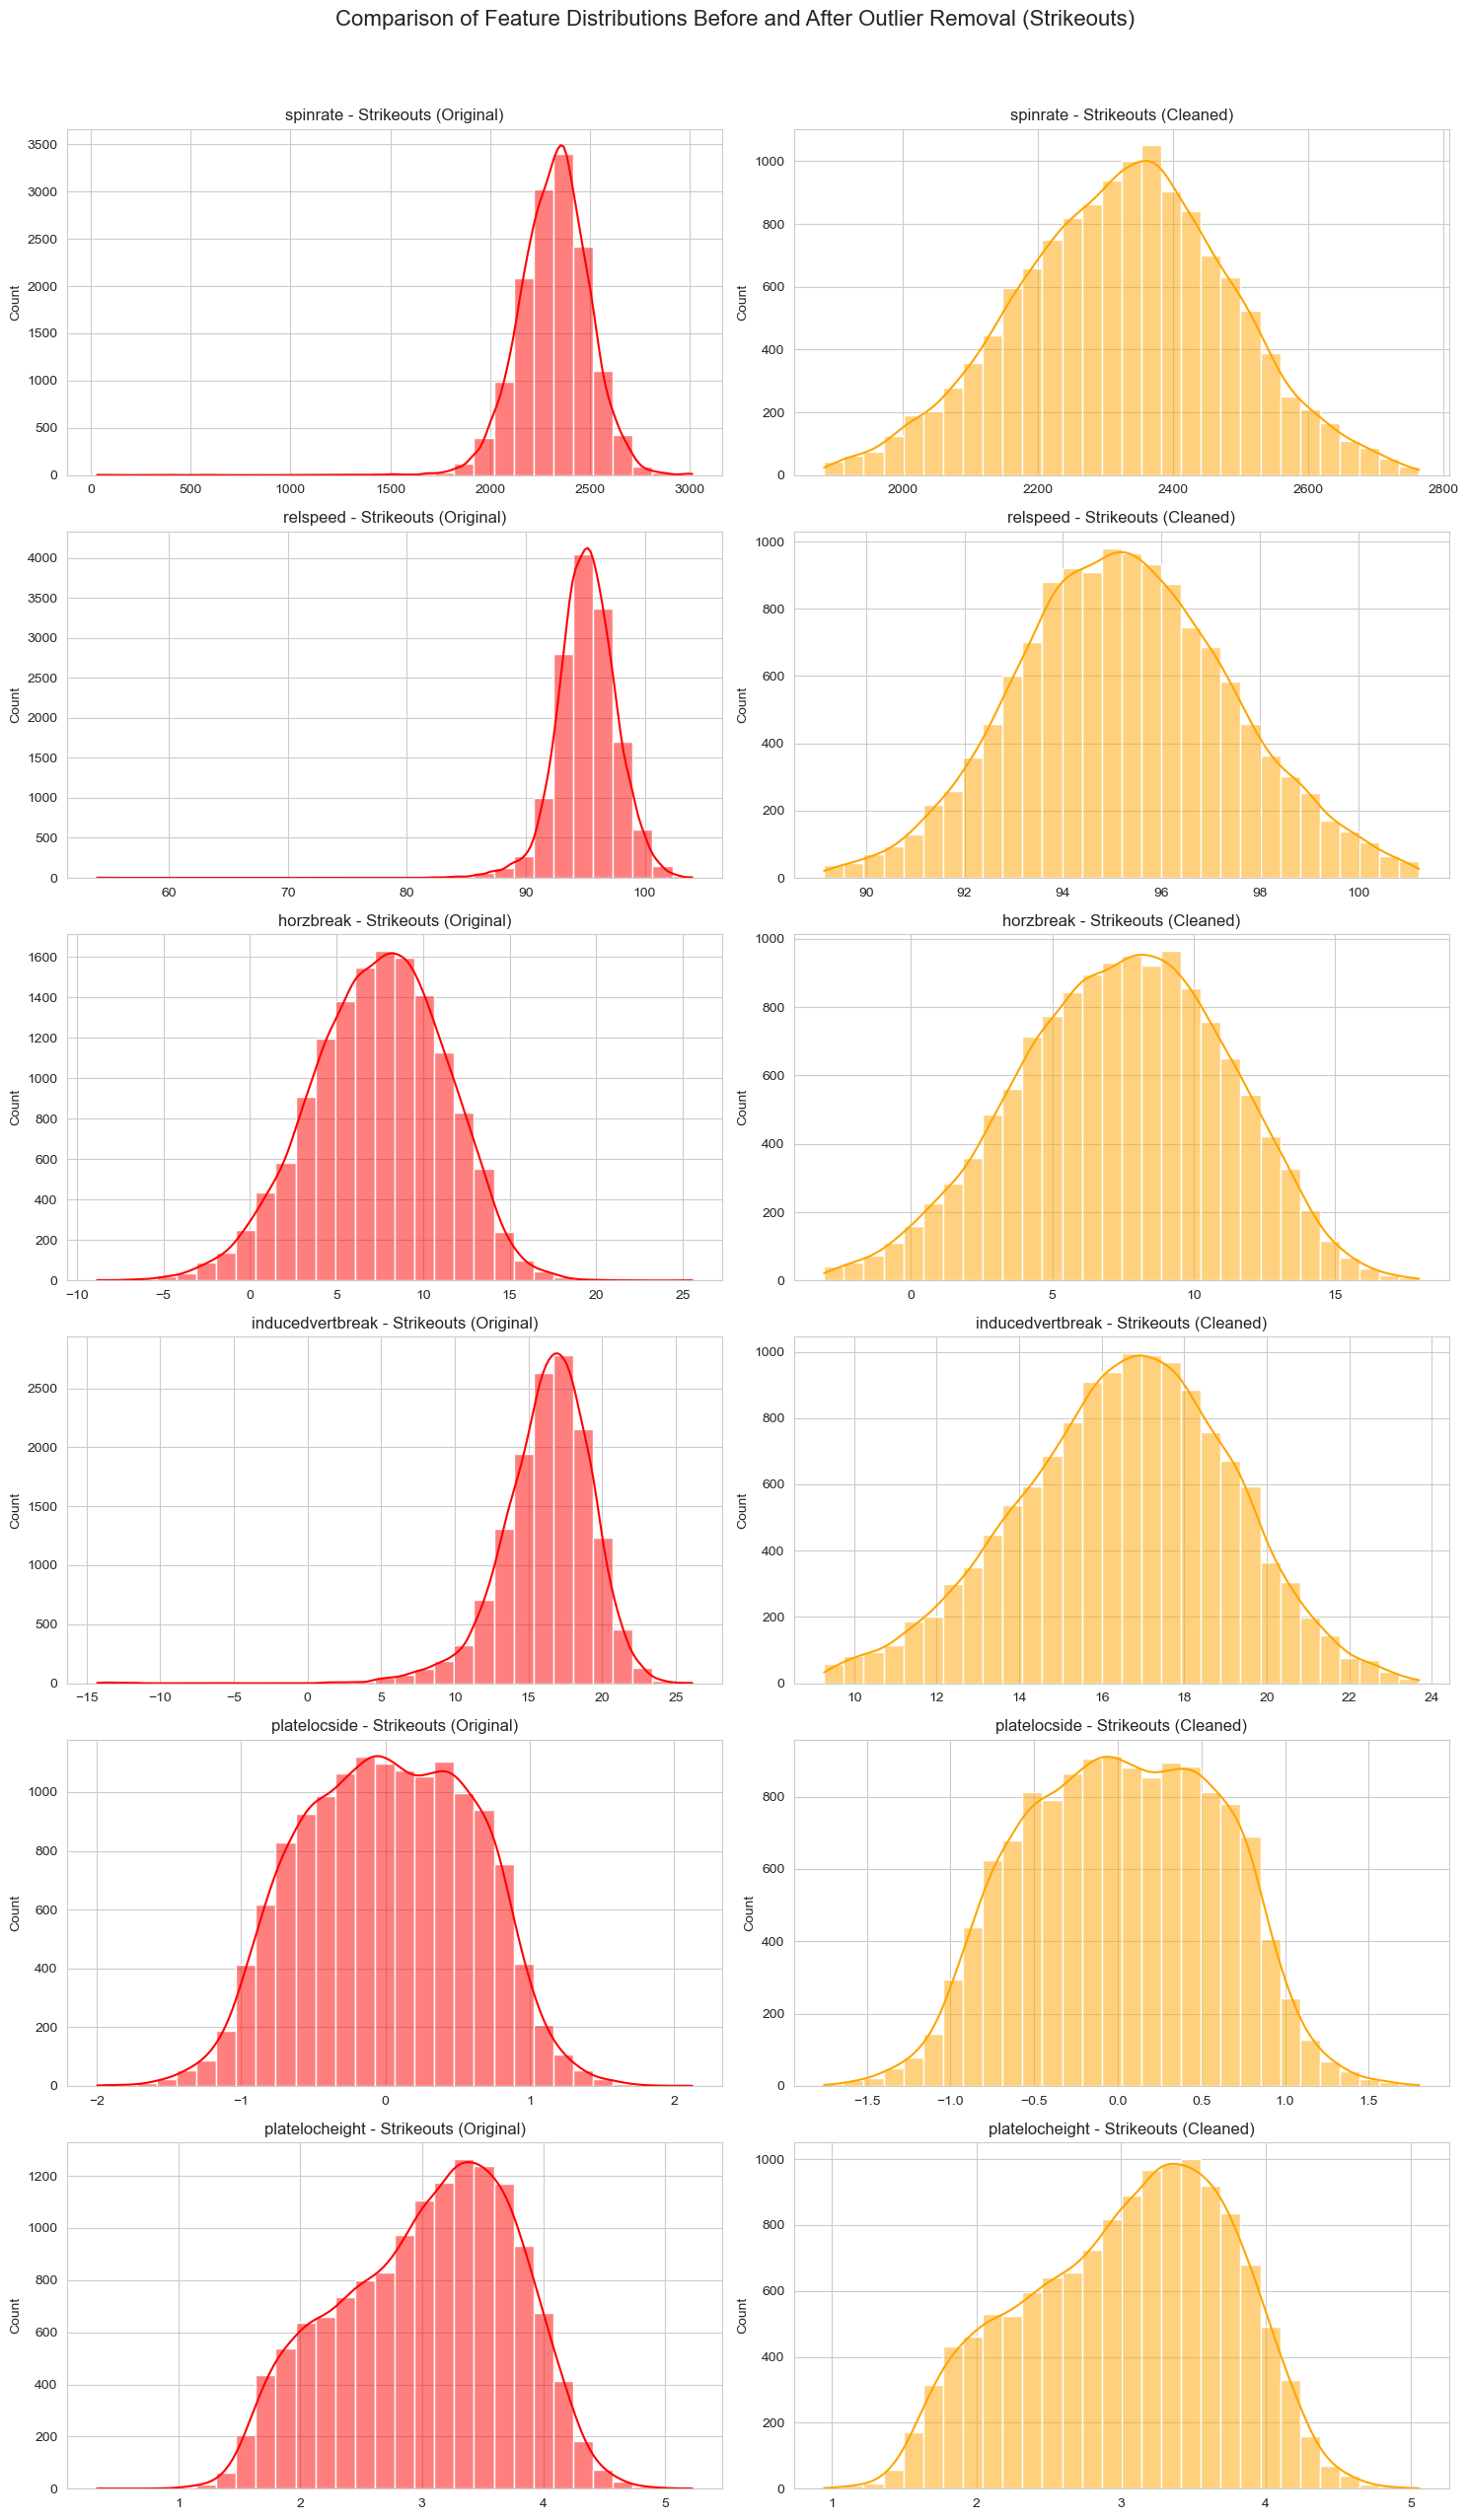

In [14]:
# Plot histograms of numerical features before and after outlier removal for non-strikeouts and strikeouts

# Original strikeout and non-strikeout data
original_strikeout_data = data[data['strikeout_binary'] == 1]
original_non_strikeout_data = data[data['strikeout_binary'] == 0]

# Features to visualize
features_to_visualize = ['spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 'platelocside', 'platelocheight']

# Plot before and after for each feature
fig, axes = plt.subplots(len(features_to_visualize), 2, figsize=(15, 25))
fig.suptitle('Comparison of Feature Distributions Before and After Outlier Removal', fontsize=16, y=1.02)

for i, feature in enumerate(features_to_visualize):
    # Original data (non-strikeouts)
    sns.histplot(original_non_strikeout_data[feature], bins=30, kde=True, color='blue', ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} - Non-strikeouts (Original)')
    axes[i, 0].set_xlabel('')

    # Cleaned data (non-strikeouts)
    sns.histplot(non_strikeout_data_cleaned[feature], bins=30, kde=True, color='green', ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} - Non-strikeouts (Cleaned)')
    axes[i, 1].set_xlabel('')

plt.tight_layout()
plt.show()

# Plot for strikeouts
fig, axes = plt.subplots(len(features_to_visualize), 2, figsize=(15, 25))
fig.suptitle('Comparison of Feature Distributions Before and After Outlier Removal (Strikeouts)', fontsize=16, y=1.02)

for i, feature in enumerate(features_to_visualize):
    # Original data (strikeouts)
    sns.histplot(original_strikeout_data[feature], bins=30, kde=True, color='red', ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} - Strikeouts (Original)')
    axes[i, 0].set_xlabel('')

    # Cleaned data (strikeouts)
    sns.histplot(strikeout_data_cleaned[feature], bins=30, kde=True, color='orange', ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} - Strikeouts (Cleaned)')
    axes[i, 1].set_xlabel('')

plt.tight_layout()
plt.show()


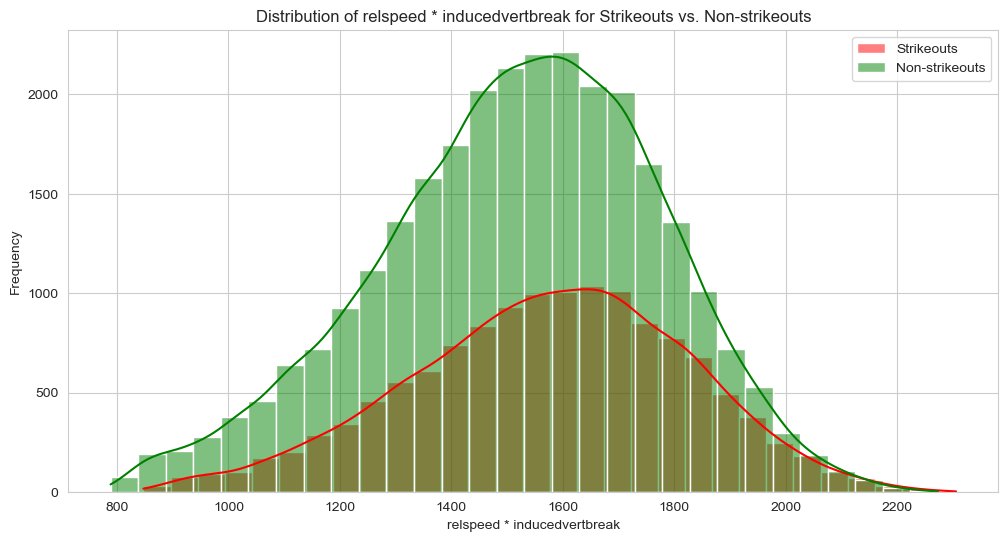

In [15]:
# Create a new variable that is relspeed and inducedvertbreak multiplied together
cleaned_data_classwise['relspeed_inducedvertbreak'] = cleaned_data_classwise['relspeed'] * cleaned_data_classwise['inducedvertbreak']

# Separate data into strikeouts and non-strikeouts
strikeout_data = cleaned_data_classwise[cleaned_data_classwise['strikeout_binary'] == 1]
non_strikeout_data = cleaned_data_classwise[cleaned_data_classwise['strikeout_binary'] == 0]

# Plot the distribution of the new variable for strikeouts and non-strikeouts
plt.figure(figsize=(12, 6))
sns.histplot(strikeout_data['relspeed_inducedvertbreak'], bins=30, kde=True, color='red', label='Strikeouts')
sns.histplot(non_strikeout_data['relspeed_inducedvertbreak'], bins=30, kde=True, color='green', label='Non-strikeouts')
plt.title('Distribution of relspeed * inducedvertbreak for Strikeouts vs. Non-strikeouts')
plt.xlabel('relspeed * inducedvertbreak')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [16]:
non_strikeout_data['eventtype'].unique()

array(['ball'], dtype=object)

In [17]:
feature_columns = [
        'spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 
        'platelocside', 'platelocheight', 'relspeed_inducedvertbreak'
    ]
cleaned_data_classwise[feature_columns].corr()

,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,relspeed_inducedvertbreak
spinrate,1.000000,0.230305,-0.072591,0.230509,0.051147,-0.100059,0.261418
relspeed,0.230305,1.000000,0.139476,0.042099,0.059584,-0.151613,0.183004
horzbreak,-0.072591,0.139476,1.000000,-0.146971,-0.090428,-0.080235,-0.126726
inducedvertbreak,0.230509,0.042099,-0.146971,1.000000,0.031926,-0.005492,0.989661
platelocside,0.051147,0.059584,-0.090428,0.031926,1.000000,-0.310025,0.039923
platelocheight,-0.100059,-0.151613,-0.080235,-0.005492,-0.310025,1.000000,-0.027249
relspeed_inducedvertbreak,0.261418,0.183004,-0.126726,0.989661,0.039923,-0.027249,1.000000


### If I want to keep just the interaction term:

In [18]:
# Count the appearances for each pitcher and filter out those with fewer than 50 appearances
pitcher_appearances = cleaned_data_classwise['pitcher'].value_counts()
pitchers_with_100_plus_appearances = pitcher_appearances[pitcher_appearances >= 100].index

# Filter the dataframe to include only pitchers with 50 or more appearances
cleaned_data_classwise = cleaned_data_classwise[cleaned_data_classwise['pitcher'].isin(pitchers_with_100_plus_appearances)]

cleaned_data_classwise

,pitcher,pitchname,pitchresult,eventtype,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,strikeout_binary,relspeed_inducedvertbreak
25,"Gallen, Zac",FF,C,strikeout,2502.240234,94.112892,2.462363,18.226583,0.433979,2.300865,1,1715.356485
40,"Gray, Jon",FF,C,strikeout,2257.527588,96.098084,9.364018,18.195126,-0.346139,1.675238,1,1748.516697
94,"Giolito, Lucas",FF,S,strikeout,2442.560303,93.514725,5.891717,17.998758,-0.187572,3.245606,1,1683.148930
103,"Giolito, Lucas",FF,C,strikeout,2338.321289,94.639954,11.088030,17.145796,0.667325,3.362605,1,1622.677321
128,"Cisnero, Jose",FF,S,strikeout,2312.854248,97.639137,12.269574,11.875773,-0.608685,3.070679,1,1159.540272
...,...,...,...,...,...,...,...,...,...,...,...,...
187366,"Neris, Hector",FF,B,ball,2349.152344,92.820450,9.256570,17.239777,-1.592962,2.999201,0,1600.203820
187380,"Cole, Gerrit",FF,B,ball,2467.922363,95.901932,8.921133,18.854998,-0.713573,4.067371,0,1808.230696
187389,"Morgan, Elijah",FF,B,ball,2392.856689,93.460281,8.608335,18.574152,0.423201,4.239380,0,1735.945471
187403,"Gallegos, Giovanny",FF,B,ball,2398.320557,93.521347,10.798670,14.733393,-0.807034,4.470551,0,1377.886734


In [19]:
# # Add the new variable to the DataFrame
# # cleaned_data_classwise['VelocityBreakProduct'] = cleaned_data_classwise['relspeed'] * cleaned_data_classwise['inducedvertbreak']
# 
# # Remove the original 'relspeed' and 'inducedvertbreak' columns
# cleaned_data_classwise = cleaned_data_classwise.drop(columns=['relspeed', 'inducedvertbreak'])
# 
# # Display the first few rows of the updated DataFrame to confirm the changes
cleaned_data_classwise.head()
cleaned_data_classwise.to_csv('baseball_stuff.csv', index=False)

### More feature engineering: Making a new col 
- this col averages each pitcher's average velocity and takes into acc on a pitch by pitch basis, how much the velo differs from the pitcher's regular speed

In [20]:
# Calculate the pitcher's average release speed
cleaned_data_classwise['average_relspeed'] = cleaned_data_classwise.groupby('pitcher')['relspeed'].transform('mean')

# Calculate the difference between each pitch's release speed and the pitcher's average release speed
cleaned_data_classwise['relspeed_diff'] = cleaned_data_classwise['relspeed'] - cleaned_data_classwise['average_relspeed']

In [21]:

# Plot the distribution of the new variable for strikeouts and non-strikeouts
plt.figure(figsize=(12, 6))
sns.histplot(strikeout_data['relspeed_diff'], bins=30, kde=True, color='red', label='Strikeouts')
sns.histplot(non_strikeout_data['relspeed_diff'], bins=30, kde=True, color='green', label='Non-strikeouts')
plt.title('Distribution of Release Speed Difference for Strikeouts vs. Non-strikeouts')
plt.xlabel('Release Speed Difference (relspeed - average_relspeed)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

KeyError: 'relspeed_diff'

<Figure size 1200x600 with 0 Axes>

In [22]:
cleaned_data_classwise

,pitcher,pitchname,pitchresult,eventtype,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,strikeout_binary,relspeed_inducedvertbreak,average_relspeed,relspeed_diff
25,"Gallen, Zac",FF,C,strikeout,2502.240234,94.112892,2.462363,18.226583,0.433979,2.300865,1,1715.356485,93.791545,0.321347
40,"Gray, Jon",FF,C,strikeout,2257.527588,96.098084,9.364018,18.195126,-0.346139,1.675238,1,1748.516697,95.992436,0.105647
94,"Giolito, Lucas",FF,S,strikeout,2442.560303,93.514725,5.891717,17.998758,-0.187572,3.245606,1,1683.148930,93.606696,-0.091971
103,"Giolito, Lucas",FF,C,strikeout,2338.321289,94.639954,11.088030,17.145796,0.667325,3.362605,1,1622.677321,93.606696,1.033258
128,"Cisnero, Jose",FF,S,strikeout,2312.854248,97.639137,12.269574,11.875773,-0.608685,3.070679,1,1159.540272,96.670759,0.968379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187366,"Neris, Hector",FF,B,ball,2349.152344,92.820450,9.256570,17.239777,-1.592962,2.999201,0,1600.203820,93.618378,-0.797928
187380,"Cole, Gerrit",FF,B,ball,2467.922363,95.901932,8.921133,18.854998,-0.713573,4.067371,0,1808.230696,97.872134,-1.970202
187389,"Morgan, Elijah",FF,B,ball,2392.856689,93.460281,8.608335,18.574152,0.423201,4.239380,0,1735.945471,92.132894,1.327387
187403,"Gallegos, Giovanny",FF,B,ball,2398.320557,93.521347,10.798670,14.733393,-0.807034,4.470551,0,1377.886734,94.153721,-0.632374


## Logistic Regression

In [23]:
# Simplify pitchresult into broader categories
def categorize_pitchresult(pitchresult):
    if pitchresult in ['S', 'C']:  # Likely strike-related
        return 'strike_related'
    elif pitchresult in ['X', 'D', 'T', 'O']:  # In-play outcomes
        return 'in_play'
    elif pitchresult in ['B', 'W']:  # Balls and walks
        return 'ball_related'
    elif pitchresult == 'F':  # Foul
        return 'foul'
    else:  # Other miscellaneous outcomes
        return 'other'

# Apply categorization
cleaned_data_classwise['pitchresult_category'] = cleaned_data_classwise['pitchresult'].apply(categorize_pitchresult)

# One-hot encode the new categorical columns for logistic regression
data_encoded = pd.get_dummies(cleaned_data_classwise, columns=['pitchresult_category'], drop_first=True)

# Define the new feature set including the encoded pitchresult categories and original features
feature_columns = [
        'spinrate', 'average_relspeed', 'relspeed_diff', 'horzbreak', 'inducedvertbreak', 
        'platelocside', 'platelocheight', 'relspeed_inducedvertbreak'
    ] # + [col for col in data_encoded.columns if 'pitchresult_category_' in col]

# Separate features and target
X = data_encoded[feature_columns]
y = data_encoded['strikeout_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model with class weights to handle imbalance
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

accuracy, precision, recall, roc_auc

(0.6421485260770975,
 0.4770375161707633,
 0.6189676877885019,
 0.6891850838366742)

### OverSampling

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = cleaned_data_classwise[[
        'spinrate', 'average_relspeed', 'relspeed_diff', 'horzbreak', 'inducedvertbreak', 
        'platelocside', 'platelocheight', 'relspeed_inducedvertbreak'
    ]]
y = cleaned_data_classwise['strikeout_binary']  # assuming you have a column that indicates if the outcome was a strikeout (0 or 1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train logistic regression model with class weights to handle imbalance
log_reg = LogisticRegression(max_iter=1000,  class_weight={0: 1, 1: 0.94})
# log_reg = LogisticRegression(max_iter=1000,  class_weight="balanced")

log_reg.fit(X_resampled, y_resampled)

# Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

accuracy, precision, recall, roc_auc

(0.6437074829931972,
 0.48427152317880795,
 0.5794947994056464,
 0.692658670370409)

In [25]:
# X_train

### Looking at the Coefficients

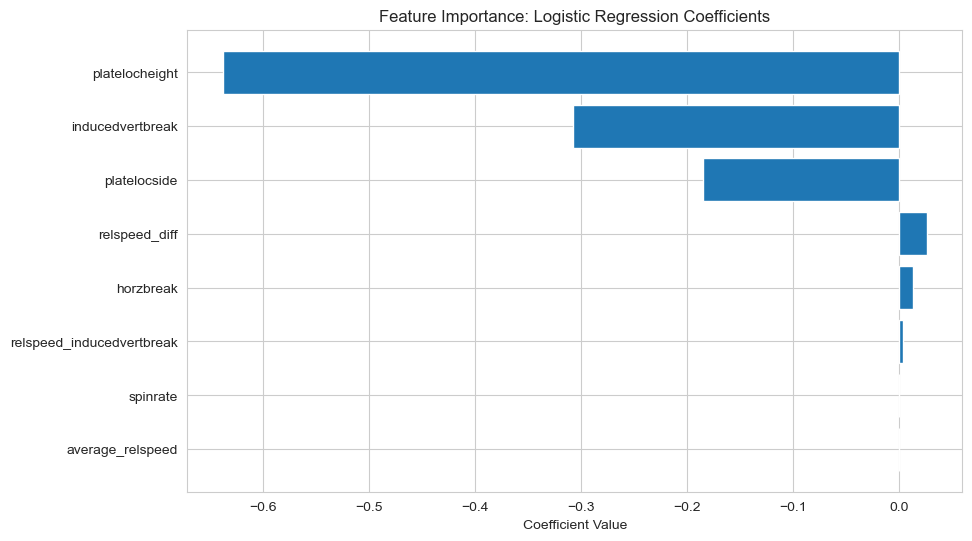

,Feature,Coefficient
6,platelocheight,-0.638260
4,inducedvertbreak,-0.307868
5,platelocside,-0.185149
2,relspeed_diff,0.026656
3,horzbreak,0.012863
7,relspeed_inducedvertbreak,0.003868
0,spinrate,0.000422
1,average_relspeed,0.000024


In [26]:
# Get the feature names and coefficients
feature_names = X_train.columns
coefficients = log_reg.coef_[0]

# Create a DataFrame for easier interpretation
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot the coefficients for visual clarity
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance: Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.show()

feature_importance

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model with class weights to handle imbalance
rf_model = RandomForestClassifier(n_estimators=100, class_weight={0: 1, 1: 2}, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

accuracy_rf, precision_rf, recall_rf, roc_auc_rf

(0.8578231292517007,
 0.8258953168044078,
 0.7424467558197128,
 0.9212165212660508)

In [28]:
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
# 
# # Load the data
# # df = pd.read_csv(file_path)
# 
# # Simplify pitchresult into broader categories
# df['pitchresult_category'] = df['pitchresult'].apply(categorize_pitchresult)
# 
# # One-hot encode the new categorical columns for logistic regression
# data_encoded = pd.get_dummies(df, columns=['pitchresult_category'], drop_first=True)
# 
# # Define the new feature set including the encoded pitchresult categories and original features
# feature_columns = [
#     'spinrate', 'relspeed', 'horzbreak', 'inducedvertbreak', 
#     'platelocside', 'platelocheight'
# ] + [col for col in data_encoded.columns if 'pitchresult_category_' in col]
# 
# # Separate features and target
# X = data_encoded[feature_columns]
# y = data_encoded['strikeout_binary']
# 
# # Oversample the minority class using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)
# 
# # Feature scaling
# scaler = StandardScaler()
# X_resampled_scaled = scaler.fit_transform(X_resampled)
# 
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.3, random_state=42)
# 
# # Train Random Forest model with class weights to handle imbalance
# rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
# rf_model.fit(X_train, y_train)
# 
# # Make predictions
# y_pred_rf = rf_model.predict(X_test)
# y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]
# 
# # Evaluate the Random Forest model
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# precision_rf = precision_score(y_test, y_pred_rf, zero_division=1)
# recall_rf = recall_score(y_test, y_pred_rf)
# roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
# 
# accuracy_rf, precision_rf, recall_rf, roc_auc_rf

In [29]:
# X_train

In [30]:
# X_resampled

### DownSampling with RandomForest

In [87]:
# Define the new feature set excluding the encoded pitchresult categories to avoid data leakage
feature_columns = [
        'spinrate', 'average_relspeed', 'relspeed_diff', 'horzbreak', 'inducedvertbreak', 
        'platelocside', 'platelocheight',  'relspeed_inducedvertbreak'
    ]


# Separate features and target
X = data_encoded[feature_columns]
y = data_encoded['strikeout_binary']

# Concatenate features and target for resampling
data_resampled = pd.concat([X, y], axis=1)

# Separate majority and minority classes
strikeout = data_resampled[data_resampled['strikeout_binary'] == 1]
non_strikeout = data_resampled[data_resampled['strikeout_binary'] == 0]

# Downsample majority class (non-strikeouts)
non_strikeout_downsampled = resample(non_strikeout, 
                                     replace=False,    # sample without replacement
                                     n_samples=len(strikeout),  # match minority class
                                     random_state=42)

# Combine minority class with downsampled majority class
data_balanced = pd.concat([strikeout, non_strikeout_downsampled])

# Separate features and target after resampling
X_balanced = data_balanced.drop('strikeout_binary', axis=1)
y_balanced = data_balanced['strikeout_binary']

# Feature scaling
scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_scaled, y_balanced, test_size=0.3, random_state=42)

# Train Random Forest model with class weights to handle imbalance
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

accuracy_rf, precision_rf, recall_rf, roc_auc_rf

(0.8372427983539095,
 0.8439086294416244,
 0.8254033926354986,
 0.9163873849630068)

In [32]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2443
           1       0.84      0.83      0.83      2417

    accuracy                           0.84      4860
   macro avg       0.84      0.84      0.84      4860
weighted avg       0.84      0.84      0.84      4860



In [33]:
data_resampled

,spinrate,average_relspeed,relspeed_diff,horzbreak,inducedvertbreak,platelocside,platelocheight,relspeed_inducedvertbreak,strikeout_binary
25,2502.240234,93.791545,0.321347,2.462363,18.226583,0.433979,2.300865,1715.356485,1
40,2257.527588,95.992436,0.105647,9.364018,18.195126,-0.346139,1.675238,1748.516697,1
94,2442.560303,93.606696,-0.091971,5.891717,17.998758,-0.187572,3.245606,1683.148930,1
103,2338.321289,93.606696,1.033258,11.088030,17.145796,0.667325,3.362605,1622.677321,1
128,2312.854248,96.670759,0.968379,12.269574,11.875773,-0.608685,3.070679,1159.540272,1
...,...,...,...,...,...,...,...,...,...
187366,2349.152344,93.618378,-0.797928,9.256570,17.239777,-1.592962,2.999201,1600.203820,0
187380,2467.922363,97.872134,-1.970202,8.921133,18.854998,-0.713573,4.067371,1808.230696,0
187389,2392.856689,92.132894,1.327387,8.608335,18.574152,0.423201,4.239380,1735.945471,0
187403,2398.320557,94.153721,-0.632374,10.798670,14.733393,-0.807034,4.470551,1377.886734,0


In [34]:
# Interaction between spinrate and relspeed
data_encoded['spinrate_relspeed'] = data_encoded['spinrate'] * data_encoded['relspeed']

# Movement Ratio between horizontal and vertical break
data_encoded['movement_ratio'] = data_encoded['horzbreak'] / (data_encoded['inducedvertbreak'] + 1e-5)

# Normalize plate location to capture if the pitch is at the edge of the strike zone
data_encoded['is_edge_pitch'] = (
    (data_encoded['platelocside'].abs() > 0.7) |  # Assuming a threshold for edge pitches
    (data_encoded['platelocheight'] < 1.5) | 
    (data_encoded['platelocheight'] > 3.5)
).astype(int)

In [35]:
data_encoded

,pitcher,pitchname,pitchresult,eventtype,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,strikeout_binary,relspeed_inducedvertbreak,average_relspeed,relspeed_diff,pitchresult_category_in_play,pitchresult_category_other,pitchresult_category_strike_related,spinrate_relspeed,movement_ratio,is_edge_pitch
25,"Gallen, Zac",FF,C,strikeout,2502.240234,94.112892,2.462363,18.226583,0.433979,2.300865,1,1715.356485,93.791545,0.321347,False,False,True,235493.065276,0.135097,0
40,"Gray, Jon",FF,C,strikeout,2257.527588,96.098084,9.364018,18.195126,-0.346139,1.675238,1,1748.516697,95.992436,0.105647,False,False,True,216944.074655,0.514644,0
94,"Giolito, Lucas",FF,S,strikeout,2442.560303,93.514725,5.891717,17.998758,-0.187572,3.245606,1,1683.148930,93.606696,-0.091971,False,False,True,228415.354371,0.327340,0
103,"Giolito, Lucas",FF,C,strikeout,2338.321289,94.639954,11.088030,17.145796,0.667325,3.362605,1,1622.677321,93.606696,1.033258,False,False,True,221298.618316,0.646691,0
128,"Cisnero, Jose",FF,S,strikeout,2312.854248,97.639137,12.269574,11.875773,-0.608685,3.070679,1,1159.540272,96.670759,0.968379,False,False,True,225825.093406,1.033159,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187366,"Neris, Hector",FF,B,ball,2349.152344,92.820450,9.256570,17.239777,-1.592962,2.999201,0,1600.203820,93.618378,-0.797928,False,False,False,218049.377289,0.536931,1
187380,"Cole, Gerrit",FF,B,ball,2467.922363,95.901932,8.921133,18.854998,-0.713573,4.067371,0,1808.230696,97.872134,-1.970202,False,False,False,236678.522045,0.473144,1
187389,"Morgan, Elijah",FF,B,ball,2392.856689,93.460281,8.608335,18.574152,0.423201,4.239380,0,1735.945471,92.132894,1.327387,False,False,False,223637.059432,0.463458,1
187403,"Gallegos, Giovanny",FF,B,ball,2398.320557,93.521347,10.798670,14.733393,-0.807034,4.470551,0,1377.886734,94.153721,-0.632374,False,False,False,224294.169148,0.732938,1


In [36]:
# Create new engineered features

# Interaction between spinrate and relspeed
data_encoded['spinrate_relspeed'] = data_encoded['spinrate'] * data_encoded['relspeed']

# Movement Ratio between horizontal and vertical break
data_encoded['movement_ratio'] = data_encoded['horzbreak'] / (data_encoded['inducedvertbreak'] + 1e-5)

# Normalize plate location to capture if the pitch is at the edge of the strike zone
data_encoded['is_edge_pitch'] = (
    (data_encoded['platelocside'].abs() > 0.7) |  # Assuming a threshold for edge pitches
    (data_encoded['platelocheight'] < 1.5) | 
    (data_encoded['platelocheight'] > 3.5)
).astype(int)

#Update the feature columns to include the new engineered features
feature_columns = [ 'relspeed_inducedvertbreak', 'relspeed',
        'spinrate', 'relspeed_diff', 'horzbreak', 'inducedvertbreak', 
        'platelocside', 'platelocheight'
    ]


# feature_columns = []
# feature_columns = ['platelocside', 'platelocheight', 'relspeed_diff', 'horzbreak']

# feature_columns = ["spinrate", "relspeed", "horzbreak", "inducedvertbreak", "platelocheight", "platelocside", "is_edge_pitch"]
#, 'relspeed_inducedvertbreak'] # - prob gonna go with this one

# feature_columns = ['average_relspeed','spinrate','platelocside', 'platelocheight', 'is_edge_pitch'] - might go with this one

# Separate features and target
X = data_encoded[feature_columns]
y = data_encoded['strikeout_binary']

# Concatenate features and target for resampling
data_resampled = pd.concat([X, y], axis=1)

# Separate majority and minority classes
strikeout = data_resampled[data_resampled['strikeout_binary'] == 1]
non_strikeout = data_resampled[data_resampled['strikeout_binary'] == 0]

# Downsample majority class (non-strikeouts)
non_strikeout_downsampled = resample(non_strikeout, 
                                     replace=False,    # sample without replacement
                                     n_samples=len(strikeout),  # match minority class
                                     random_state=42)

# Combine minority class with downsampled majority class
data_balanced = pd.concat([strikeout, non_strikeout_downsampled])

# Separate features and target after resampling
X_balanced = data_balanced.drop('strikeout_binary', axis=1)
y_balanced = data_balanced['strikeout_binary']

# Feature scaling
scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_scaled, y_balanced, test_size=0.3, random_state=42)

# Train Random Forest model with class weights to handle imbalance
rf_model = RandomForestClassifier(n_estimators=1000, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

accuracy_rf, precision_rf, recall_rf, roc_auc_rf

(0.8376543209876544, 0.844623200677392, 0.8254033926354986, 0.9181277690719526)

In [37]:
metrics_rf = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'ROC AUC'],
    'Value': [accuracy_rf, precision_rf, recall_rf, roc_auc_rf]
}

# Convert dictionary to a DataFrame
accuracy_metrics_rf_df  = pd.DataFrame(metrics_rf)

accuracy_metrics_rf_df 

,Metric,Value
0,Accuracy,0.837654
1,Precision,0.844623
2,Recall,0.825403
3,ROC AUC,0.918128


In [38]:
X_balanced

,relspeed_inducedvertbreak,relspeed,spinrate,relspeed_diff,horzbreak,inducedvertbreak,platelocside,platelocheight
25,1715.356485,94.112892,2502.240234,0.321347,2.462363,18.226583,0.433979,2.300865
40,1748.516697,96.098084,2257.527588,0.105647,9.364018,18.195126,-0.346139,1.675238
94,1683.148930,93.514725,2442.560303,-0.091971,5.891717,17.998758,-0.187572,3.245606
103,1622.677321,94.639954,2338.321289,1.033258,11.088030,17.145796,0.667325,3.362605
128,1159.540272,97.639137,2312.854248,0.968379,12.269574,11.875773,-0.608685,3.070679
...,...,...,...,...,...,...,...,...
43286,1628.820084,93.039658,2449.716309,-0.362092,5.803945,17.506729,-0.382176,0.987228
178410,1899.871356,95.291809,2391.142578,-1.582009,6.409439,19.937405,-0.950881,4.165945
185579,1342.625665,94.930244,2256.769531,0.823817,6.576117,14.143287,-0.281895,3.751494
28815,1912.102915,96.415863,2535.510986,2.813170,7.306380,19.831829,1.091127,1.870396


## XGBoost 

In [97]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the tuned XGBoost model
y_pred_best_xgb = best_xgb_model.predict(X_test)
y_pred_best_xgb_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the tuned XGBoost model
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
precision_best_xgb = precision_score(y_test, y_pred_best_xgb, zero_division=1)
recall_best_xgb = recall_score(y_test, y_pred_best_xgb)
roc_auc_best_xgb = roc_auc_score(y_test, y_pred_best_xgb_proba)

best_params, accuracy_best_xgb, precision_best_xgb, recall_best_xgb, roc_auc_best_xgb

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:03:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:03:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:03:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/nathanglen/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [00:03:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, U

({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8},
 0.8430041152263374,
 0.8498307952622673,
 0.8311956971452213,
 0.9258488659347902)

In [98]:
# import pickle
# 
# # Save the model
# with open('best_xgb_model.pkl', 'wb') as file:
#     pickle.dump(best_xgb_model, file)

In [99]:
metrics_xgb = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'ROC AUC'],
    'Value': [accuracy_best_xgb, precision_best_xgb, recall_best_xgb, roc_auc_best_xgb]
}

# Convert dictionary to a DataFrame
accuracy_metrics_xgb_df  = pd.DataFrame(metrics_xgb)

accuracy_metrics_xgb_df 

,Metric,Value
0,Accuracy,0.843004
1,Precision,0.849831
2,Recall,0.831196
3,ROC AUC,0.925849


In [100]:
print(classification_report(y_test, y_pred_best_xgb))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2443
           1       0.85      0.83      0.84      2417

    accuracy                           0.84      4860
   macro avg       0.84      0.84      0.84      4860
weighted avg       0.84      0.84      0.84      4860



In [101]:
# Generate the confusion matrix for the tuned XGBoost model (best from RandomizedSearchCV)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_best_xgb)

conf_matrix_xgb

array([[2088,  355],
       [ 408, 2009]])

In [102]:
X_train

array([[ 0.8070004 , -0.77551368, -0.36196526, ..., -0.52128418,
         0.51919877,  1.37188793],
       [ 0.04177012, -0.76277602,  0.07888406, ..., -0.43669512,
        -0.51043242,  0.07225738],
       [ 0.90102534,  1.56013714, -0.99251497, ...,  0.37211853,
         0.79536214,  0.89100223],
       ...,
       [-0.36641517, -0.77296513, -0.6615058 , ...,  1.2773462 ,
        -0.11445899,  0.79390548],
       [ 1.10753625,  0.85398871,  0.80667852, ..., -0.60951214,
         0.99748746,  0.9179688 ],
       [ 0.16094313,  0.45818212,  0.40101272, ..., -0.43048959,
         0.29373068,  0.31229693]])

In [103]:
y_pred_best_xgb.shape

(4860,)

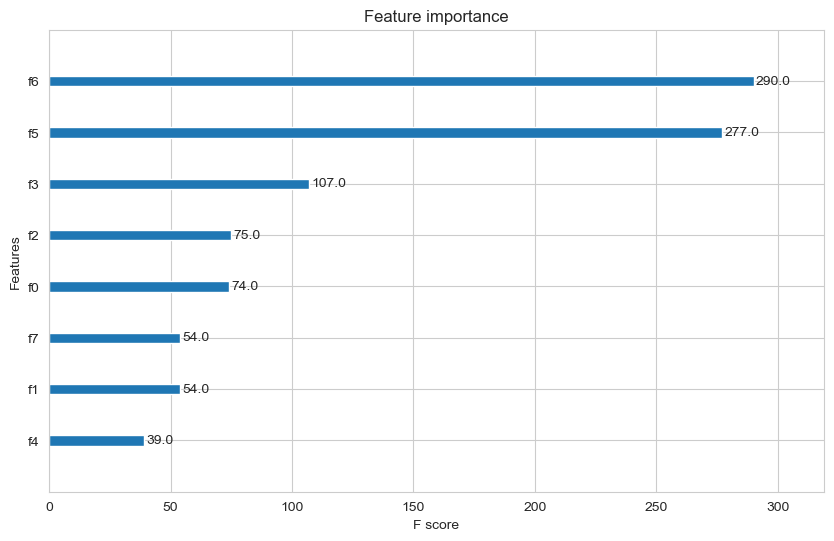

In [104]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot the feature importance
plt.figure(figsize=(10, 6))
plot_importance(best_xgb_model, importance_type='weight', ax=plt.gca())
plt.show()

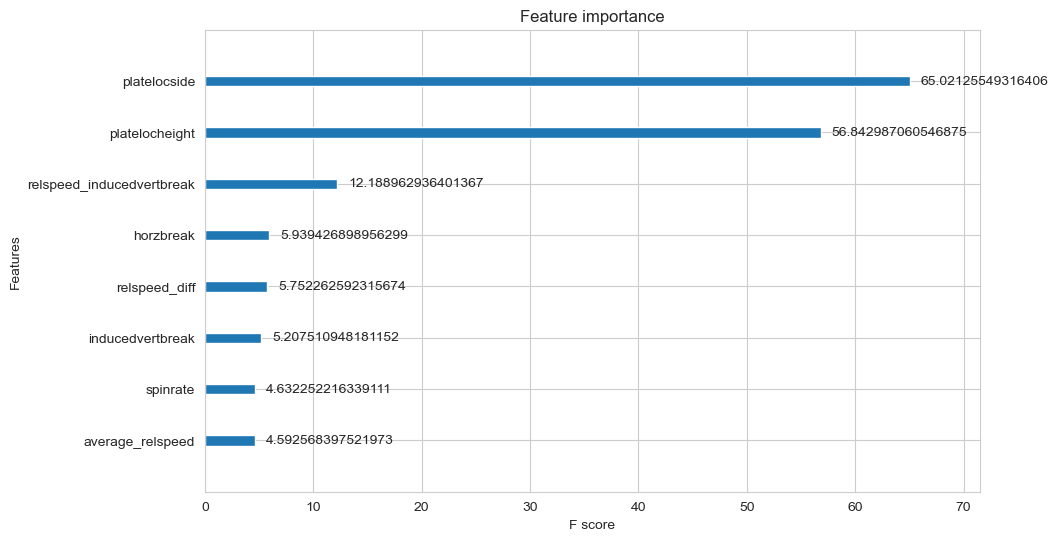

In [105]:
# Create a dictionary to map feature indices to the actual column names
feature_names = {f"f{i}": col for i, col in enumerate(X_balanced.columns)}

# Plot feature importance with renamed features
plt.figure(figsize=(10, 6))
ax = plot_importance(best_xgb_model, importance_type='gain', ax=plt.gca())

# Rename the feature labels
ax.set_yticklabels([feature_names[label.get_text()] for label in ax.get_yticklabels()])
plt.show()

In [75]:
import numpy as np

# Get feature importances from the model
importances = best_xgb_model.get_booster().get_score(importance_type='gain')

# Map the feature indices to actual column names and importance values
feature_importances = np.array([(feature_names[feature], importance) for feature, importance in importances.items()])
feature_importances_dict = {feature_names[feature]: importance for feature, importance in importances.items()}

# Display or use the feature_importances array
feature_importances_dict

{'relspeed_inducedvertbreak': 10.59827709197998,
 'relspeed': 5.66037130355835,
 'spinrate': 5.011758804321289,
 'relspeed_diff': 6.481090068817139,
 'horzbreak': 5.81624698638916,
 'inducedvertbreak': 5.520624160766602,
 'platelocside': 61.498783111572266,
 'platelocheight': 59.099395751953125}

In [76]:
import shap
import xgboost as xgb

# Create the SHAP explainer
explainer = shap.Explainer(best_xgb_model, X_balanced)

# Calculate SHAP values for the dataset
shap_values = explainer(X_balanced)

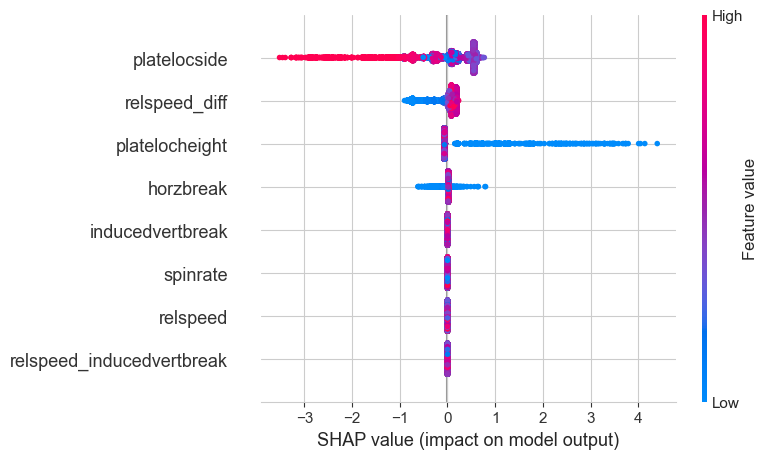

In [77]:
shap.summary_plot(shap_values, X_balanced)

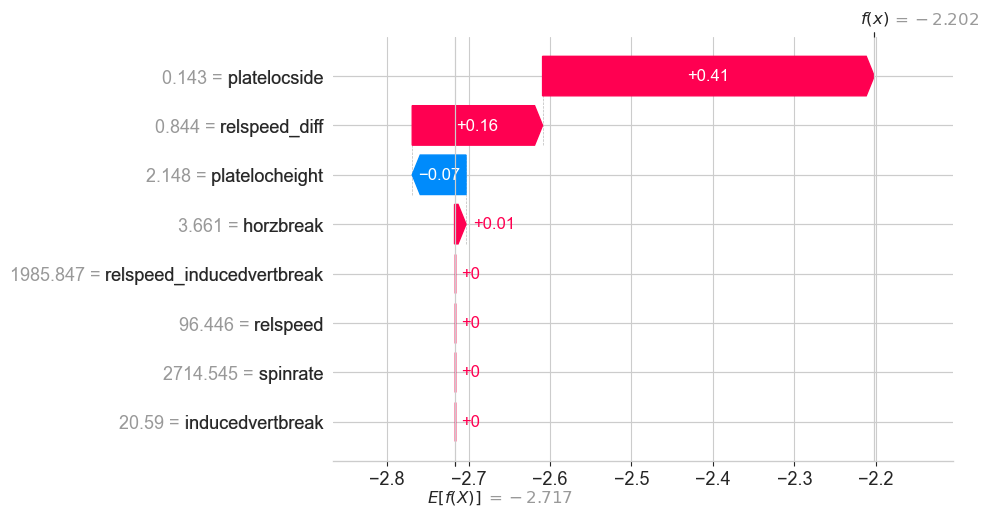

In [78]:
# Assuming X_balanced is a DataFrame or numpy array
single_instance = X_balanced.iloc[[200]]  # Replace 0 with the index of the desired observation

# Calculate SHAP values for the single instance
shap_values_single = explainer(single_instance)

# Plot SHAP values for the single observation
shap.waterfall_plot(shap_values_single[0])

In [93]:
# X_balanced
# X_balanced.to_csv('data/X_balanced.csv')

,spinrate,average_relspeed,relspeed_diff,horzbreak,inducedvertbreak,platelocside,platelocheight,relspeed_inducedvertbreak
25,2502.240234,93.791545,0.321347,2.462363,18.226583,0.433979,2.300865,1715.356485
40,2257.527588,95.992436,0.105647,9.364018,18.195126,-0.346139,1.675238,1748.516697
94,2442.560303,93.606696,-0.091971,5.891717,17.998758,-0.187572,3.245606,1683.148930
103,2338.321289,93.606696,1.033258,11.088030,17.145796,0.667325,3.362605,1622.677321
128,2312.854248,96.670759,0.968379,12.269574,11.875773,-0.608685,3.070679,1159.540272
...,...,...,...,...,...,...,...,...
43286,2449.716309,93.401750,-0.362092,5.803945,17.506729,-0.382176,0.987228,1628.820084
178410,2391.142578,96.873818,-1.582009,6.409439,19.937405,-0.950881,4.165945,1899.871356
185579,2256.769531,94.106427,0.823817,6.576117,14.143287,-0.281895,3.751494,1342.625665
28815,2535.510986,93.602693,2.813170,7.306380,19.831829,1.091127,1.870396,1912.102915


In [96]:
# data_encoded[0:16198]
# data_encoded[0:16198].to_csv('data/data_balanced.csv')

## Attempting to Create a score based on Feature Importance
- Removed pitchers that only had one pitch, because they are irrelevant to our ranking

In [51]:
og_data = cleaned_data_classwise
og_data 

,pitcher,pitchname,pitchresult,eventtype,spinrate,relspeed,horzbreak,inducedvertbreak,platelocside,platelocheight,strikeout_binary,relspeed_inducedvertbreak,average_relspeed,relspeed_diff,pitchresult_category
25,"Gallen, Zac",FF,C,strikeout,2502.240234,94.112892,2.462363,18.226583,0.433979,2.300865,1,1715.356485,93.791545,0.321347,strike_related
40,"Gray, Jon",FF,C,strikeout,2257.527588,96.098084,9.364018,18.195126,-0.346139,1.675238,1,1748.516697,95.992436,0.105647,strike_related
94,"Giolito, Lucas",FF,S,strikeout,2442.560303,93.514725,5.891717,17.998758,-0.187572,3.245606,1,1683.148930,93.606696,-0.091971,strike_related
103,"Giolito, Lucas",FF,C,strikeout,2338.321289,94.639954,11.088030,17.145796,0.667325,3.362605,1,1622.677321,93.606696,1.033258,strike_related
128,"Cisnero, Jose",FF,S,strikeout,2312.854248,97.639137,12.269574,11.875773,-0.608685,3.070679,1,1159.540272,96.670759,0.968379,strike_related
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187366,"Neris, Hector",FF,B,ball,2349.152344,92.820450,9.256570,17.239777,-1.592962,2.999201,0,1600.203820,93.618378,-0.797928,ball_related
187380,"Cole, Gerrit",FF,B,ball,2467.922363,95.901932,8.921133,18.854998,-0.713573,4.067371,0,1808.230696,97.872134,-1.970202,ball_related
187389,"Morgan, Elijah",FF,B,ball,2392.856689,93.460281,8.608335,18.574152,0.423201,4.239380,0,1735.945471,92.132894,1.327387,ball_related
187403,"Gallegos, Giovanny",FF,B,ball,2398.320557,93.521347,10.798670,14.733393,-0.807034,4.470551,0,1377.886734,94.153721,-0.632374,ball_related


In [52]:
bruh = data_encoded.loc[:, data_encoded.columns.difference(['pitchresult_category_strike_related','pitchresult_category_foul', 'pitchresult_category_in_play', 'pitchresult_category_other', 'pitchresult_category_strikeout', 'pitchresult_category_strikeout_binary', 'movement_ratio'])]

In [53]:
# Filter the data for the desired columns
data = bruh

# Further filtering for FF pitchname and excluding 'field_out' eventtype
data = data[(data['pitchname'] == 'FF') & (~data['eventtype'].isin(['field_out']))]

# Filter to only include scenarios where pitchresult == 'C' (strikeout)
data_strikeout = data[data['pitchresult'] == 'C']

# Define the pitch characteristics for analysis
pitch_characteristics = ["spinrate", "horzbreak", "inducedvertbreak", "platelocside", "platelocheight", 
                         "relspeed", "average_relspeed", "relspeed_diff", "relspeed_inducedvertbreak"]

pitcher_stats = data_strikeout.groupby("pitcher").filter(lambda x: len(x) > 1)

# Group by pitcher and calculate the mean and standard deviation of the pitch characteristics
pitcher_stats = pitcher_stats.groupby("pitcher")[pitch_characteristics].agg(['mean', 'std'])

In [54]:
pitcher_stats.columns

MultiIndex([(                 'spinrate', 'mean'),
            (                 'spinrate',  'std'),
            (                'horzbreak', 'mean'),
            (                'horzbreak',  'std'),
            (         'inducedvertbreak', 'mean'),
            (         'inducedvertbreak',  'std'),
            (             'platelocside', 'mean'),
            (             'platelocside',  'std'),
            (           'platelocheight', 'mean'),
            (           'platelocheight',  'std'),
            (                 'relspeed', 'mean'),
            (                 'relspeed',  'std'),
            (         'average_relspeed', 'mean'),
            (         'average_relspeed',  'std'),
            (            'relspeed_diff', 'mean'),
            (            'relspeed_diff',  'std'),
            ('relspeed_inducedvertbreak', 'mean'),
            ('relspeed_inducedvertbreak',  'std')],
           )

In [55]:
pitcher_stats.reset_index(inplace=True)

pitcher_stats

pitcher     spinrate              horzbreak            \
                               mean         std       mean       std   
0     Alcantara, Sandy  2250.953055   89.434083  11.394299  1.973012   
1        Anderson, Ian  2073.189982   75.784771   6.684580  2.508053   
2     Armstrong, Shawn  2379.266330  156.698765   5.465726  1.648723   
3         Baker, Bryan  2399.184814   20.007185   5.580895  0.583060   
4        Barria, Jaime  2281.902588   98.742268   3.996998  2.821732   
..                 ...          ...         ...        ...       ...   
125   Williams, Trevor  2230.509740  131.214453   6.703938  3.036609   
126      Wilson, Bryse  2182.647339   53.214552   8.381610  2.414892   
127     Wittgren, Nick  2101.540609   84.330044   9.281294  2.911694   
128  Woodruff, Brandon  2390.251256   83.971285   6.156536  1.836366   
129      deGrom, Jacob  2509.720378   89.322578   9.637349  2.338369   

    inducedvertbreak           platelocside           platelocheight  \
                mean       std         mean       std           mean   
0          13.852920  1.702981     0.291596  0.570468       2.483560   
1          17.805747  2.097221    -0.091908  0.670830       2.271231   
2          17.225413  1.812679    -0.019244  0.599269       2.284756   
3          19.927160  2.615265     0.291031  1.054022       2.425038   
4          17.442521  1.855896    -0.324939  0.746184       2.752957   
..               ...       ...          ...       ...            ...   
125        13.361493  1.938120     0.016931  0.695670       2.301460   
126        16.064389  0.178589     0.017938  0.638094       2.294197   
127        15.765023  1.569172    -0.051991  0.583881       2.014719   
128        17.323214  1.510718     0.222128  0.507186       2.188057   
129        16.749888  1.428465     0.508491  0.533239       2.306807   

                relspeed           average_relspeed      relspeed_diff  \
          std       mean       std             mean  std          mean   
0    0.489053  98.508309  0.885321        98.636914  0.0     -0.128605   
1    0.378979  94.986231  1.208380        94.542487  0.0      0.443745   
2    0.452880  95.139359  0.939936        95.067580  0.0      0.071779   
3    0.347146  97.520348  0.288611        96.646491  0.0      0.873857   
4    0.394421  93.611178  1.032108        93.109072  0.0      0.502106   
..        ...        ...       ...              ...  ...           ...   
125  0.536214  92.003903  1.316995        91.509329  0.0      0.494574   
126  0.343850  93.726229  1.593822        93.404062  0.0      0.322167   
127  0.327326  92.821895  0.716984        92.524283  0.0      0.297612   
128  0.488198  96.942721  0.736797        96.821223  0.0      0.121498   
129  0.544661  99.659141  0.808218        99.551167  0.0      0.107974   

              relspeed_inducedvertbreak              
          std                      mean         std  
0    0.885321               1364.564999  167.643896  
1    1.208380               1689.905083  183.444847  
2    0.939936               1637.941059  163.862673  
3    0.288611               1942.926199  249.290380  
4    1.032108               1632.146631  167.997102  
..        ...                       ...         ...  
125  1.316995               1230.381118  186.631436  
126  1.593822               1505.832383   40.429494  
127  0.716984               1463.179858  144.650185  
128  0.736797               1679.485887  148.342752  
129  0.808218               1669.765137  148.316408  

[130 rows x 19 columns]

In [56]:
# bruh = data_encoded.loc[:, data_encoded.columns.difference(['pitchresult_category_strike_related','pitchresult_category_foul', 'pitchresult_category_in_play', 'pitchresult_category_other', 'pitchresult_category_strikeout', 'pitchresult_category_strikeout_binary', 'movement_ratio'])]
columns = ['pitcher'] + [col for col in bruh.columns if col != 'pitcher']
bruh = bruh[columns]

In [57]:
# Reorder columns to make "pitcher" the first column
bruh.drop(columns=['average_relspeed'], inplace=True)
bruh

,pitcher,eventtype,horzbreak,inducedvertbreak,is_edge_pitch,pitchname,pitchresult,platelocheight,platelocside,relspeed,relspeed_diff,relspeed_inducedvertbreak,spinrate,spinrate_relspeed,strikeout_binary
25,"Gallen, Zac",strikeout,2.462363,18.226583,0,FF,C,2.300865,0.433979,94.112892,0.321347,1715.356485,2502.240234,235493.065276,1
40,"Gray, Jon",strikeout,9.364018,18.195126,0,FF,C,1.675238,-0.346139,96.098084,0.105647,1748.516697,2257.527588,216944.074655,1
94,"Giolito, Lucas",strikeout,5.891717,17.998758,0,FF,S,3.245606,-0.187572,93.514725,-0.091971,1683.148930,2442.560303,228415.354371,1
103,"Giolito, Lucas",strikeout,11.088030,17.145796,0,FF,C,3.362605,0.667325,94.639954,1.033258,1622.677321,2338.321289,221298.618316,1
128,"Cisnero, Jose",strikeout,12.269574,11.875773,0,FF,S,3.070679,-0.608685,97.639137,0.968379,1159.540272,2312.854248,225825.093406,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187366,"Neris, Hector",ball,9.256570,17.239777,1,FF,B,2.999201,-1.592962,92.820450,-0.797928,1600.203820,2349.152344,218049.377289,0
187380,"Cole, Gerrit",ball,8.921133,18.854998,1,FF,B,4.067371,-0.713573,95.901932,-1.970202,1808.230696,2467.922363,236678.522045,0
187389,"Morgan, Elijah",ball,8.608335,18.574152,1,FF,B,4.239380,0.423201,93.460281,1.327387,1735.945471,2392.856689,223637.059432,0
187403,"Gallegos, Giovanny",ball,10.798670,14.733393,1,FF,B,4.470551,-0.807034,93.521347,-0.632374,1377.886734,2398.320557,224294.169148,0


## Creating Part of the Score for Release Speed!

In [58]:
bruh_1 = bruh
bruh_1

,pitcher,eventtype,horzbreak,inducedvertbreak,is_edge_pitch,pitchname,pitchresult,platelocheight,platelocside,relspeed,relspeed_diff,relspeed_inducedvertbreak,spinrate,spinrate_relspeed,strikeout_binary
25,"Gallen, Zac",strikeout,2.462363,18.226583,0,FF,C,2.300865,0.433979,94.112892,0.321347,1715.356485,2502.240234,235493.065276,1
40,"Gray, Jon",strikeout,9.364018,18.195126,0,FF,C,1.675238,-0.346139,96.098084,0.105647,1748.516697,2257.527588,216944.074655,1
94,"Giolito, Lucas",strikeout,5.891717,17.998758,0,FF,S,3.245606,-0.187572,93.514725,-0.091971,1683.148930,2442.560303,228415.354371,1
103,"Giolito, Lucas",strikeout,11.088030,17.145796,0,FF,C,3.362605,0.667325,94.639954,1.033258,1622.677321,2338.321289,221298.618316,1
128,"Cisnero, Jose",strikeout,12.269574,11.875773,0,FF,S,3.070679,-0.608685,97.639137,0.968379,1159.540272,2312.854248,225825.093406,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187366,"Neris, Hector",ball,9.256570,17.239777,1,FF,B,2.999201,-1.592962,92.820450,-0.797928,1600.203820,2349.152344,218049.377289,0
187380,"Cole, Gerrit",ball,8.921133,18.854998,1,FF,B,4.067371,-0.713573,95.901932,-1.970202,1808.230696,2467.922363,236678.522045,0
187389,"Morgan, Elijah",ball,8.608335,18.574152,1,FF,B,4.239380,0.423201,93.460281,1.327387,1735.945471,2392.856689,223637.059432,0
187403,"Gallegos, Giovanny",ball,10.798670,14.733393,1,FF,B,4.470551,-0.807034,93.521347,-0.632374,1377.886734,2398.320557,224294.169148,0


In [59]:
# Set pitcher as the index for pitcher_stats to allow easy lookup
pitcher_stats.set_index('pitcher', inplace=True)

# Define the function to calculate the new value
def calculate_z_score_adjusted(pitch, pitcher_stats, constant=5.74):
    pitcher = pitch['pitcher']
    relspeed = pitch['relspeed']
    
    # Get pitcher's mean and std for relspeed from pitcher_stats
    try:
        relspeed_mean = pitcher_stats['relspeed']['mean'][pitcher]
        relspeed_std = pitcher_stats['relspeed']['std'][pitcher]
        
        # Calculate z-score and multiply by the constant
        z_score_adjusted = ((relspeed - relspeed_mean) / relspeed_std) * constant
        return z_score_adjusted
    except KeyError:
        return np.nan

# Apply the function to the bruh dataframe
bruh_1['relspeed_adjusted'] = bruh.apply(lambda row: calculate_z_score_adjusted(row, pitcher_stats), axis=1)

In [60]:
bruh_1

,pitcher,eventtype,horzbreak,inducedvertbreak,is_edge_pitch,pitchname,pitchresult,platelocheight,platelocside,relspeed,relspeed_diff,relspeed_inducedvertbreak,spinrate,spinrate_relspeed,strikeout_binary,relspeed_adjusted
25,"Gallen, Zac",strikeout,2.462363,18.226583,0,FF,C,2.300865,0.433979,94.112892,0.321347,1715.356485,2502.240234,235493.065276,1,-0.509984
40,"Gray, Jon",strikeout,9.364018,18.195126,0,FF,C,1.675238,-0.346139,96.098084,0.105647,1748.516697,2257.527588,216944.074655,1,-0.704716
94,"Giolito, Lucas",strikeout,5.891717,17.998758,0,FF,S,3.245606,-0.187572,93.514725,-0.091971,1683.148930,2442.560303,228415.354371,1,-1.087955
103,"Giolito, Lucas",strikeout,11.088030,17.145796,0,FF,C,3.362605,0.667325,94.639954,1.033258,1622.677321,2338.321289,221298.618316,1,3.543388
128,"Cisnero, Jose",strikeout,12.269574,11.875773,0,FF,S,3.070679,-0.608685,97.639137,0.968379,1159.540272,2312.854248,225825.093406,1,2.554277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187366,"Neris, Hector",ball,9.256570,17.239777,1,FF,B,2.999201,-1.592962,92.820450,-0.797928,1600.203820,2349.152344,218049.377289,0,-8.034936
187380,"Cole, Gerrit",ball,8.921133,18.854998,1,FF,B,4.067371,-0.713573,95.901932,-1.970202,1808.230696,2467.922363,236678.522045,0,-10.063119
187389,"Morgan, Elijah",ball,8.608335,18.574152,1,FF,B,4.239380,0.423201,93.460281,1.327387,1735.945471,2392.856689,223637.059432,0,6.624764
187403,"Gallegos, Giovanny",ball,10.798670,14.733393,1,FF,B,4.470551,-0.807034,93.521347,-0.632374,1377.886734,2398.320557,224294.169148,0,-5.717904


In [61]:
# # Set pitcher as the index for pitcher_stats to allow easy lookup
# pitcher_stats.set_index('pitcher', inplace=True)
# 
# # Define the function to calculate the new value
# def calculate_z_score_adjusted(pitch, pitcher_stats, constant=6.17):
#     pitcher = pitch['pitcher']
#     relspeed = pitch['relspeed']
#     
#     # Get pitcher's mean and std for relspeed from pitcher_stats
#     try:
#         relspeed_mean = pitcher_stats['relspeed']['mean'][pitcher]
#         relspeed_std = pitcher_stats['relspeed']['std'][pitcher]
#         
#         # Calculate z-score and multiply by the constant
#         z_score_adjusted = ((relspeed - relspeed_mean) / relspeed_std) * constant
#         return z_score_adjusted
#     except KeyError:
#         return np.nan
# 
# # Apply the function to the bruh dataframe
# bruh_1['relspeed_adjusted'] = bruh.apply(lambda row: calculate_z_score_adjusted(row, pitcher_stats), axis=1)
bruh

,pitcher,eventtype,horzbreak,inducedvertbreak,is_edge_pitch,pitchname,pitchresult,platelocheight,platelocside,relspeed,relspeed_diff,relspeed_inducedvertbreak,spinrate,spinrate_relspeed,strikeout_binary,relspeed_adjusted
25,"Gallen, Zac",strikeout,2.462363,18.226583,0,FF,C,2.300865,0.433979,94.112892,0.321347,1715.356485,2502.240234,235493.065276,1,-0.509984
40,"Gray, Jon",strikeout,9.364018,18.195126,0,FF,C,1.675238,-0.346139,96.098084,0.105647,1748.516697,2257.527588,216944.074655,1,-0.704716
94,"Giolito, Lucas",strikeout,5.891717,17.998758,0,FF,S,3.245606,-0.187572,93.514725,-0.091971,1683.148930,2442.560303,228415.354371,1,-1.087955
103,"Giolito, Lucas",strikeout,11.088030,17.145796,0,FF,C,3.362605,0.667325,94.639954,1.033258,1622.677321,2338.321289,221298.618316,1,3.543388
128,"Cisnero, Jose",strikeout,12.269574,11.875773,0,FF,S,3.070679,-0.608685,97.639137,0.968379,1159.540272,2312.854248,225825.093406,1,2.554277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187366,"Neris, Hector",ball,9.256570,17.239777,1,FF,B,2.999201,-1.592962,92.820450,-0.797928,1600.203820,2349.152344,218049.377289,0,-8.034936
187380,"Cole, Gerrit",ball,8.921133,18.854998,1,FF,B,4.067371,-0.713573,95.901932,-1.970202,1808.230696,2467.922363,236678.522045,0,-10.063119
187389,"Morgan, Elijah",ball,8.608335,18.574152,1,FF,B,4.239380,0.423201,93.460281,1.327387,1735.945471,2392.856689,223637.059432,0,6.624764
187403,"Gallegos, Giovanny",ball,10.798670,14.733393,1,FF,B,4.470551,-0.807034,93.521347,-0.632374,1377.886734,2398.320557,224294.169148,0,-5.717904


In [62]:
# Define the function to calculate z-score adjusted values for different characteristics
def calculate_z_score_adjusted_for_feature(pitch, pitcher_stats, feature, constant=6.17):
    pitcher = pitch['pitcher']
    value = pitch[feature]
    
    # Get pitcher's mean and std for the feature from pitcher_stats
    try:
        feature_mean = pitcher_stats[feature]['mean'][pitcher]
        feature_std = pitcher_stats[feature]['std'][pitcher]
        
        # Calculate z-score and multiply by the constant
        z_score_adjusted = ((value - feature_mean) / feature_std) * constant
        return z_score_adjusted
    except KeyError:
        return np.nan

# Apply these functions to the `bruh` dataframe
bruh_1['spinrate_adjusted'] = bruh.apply(lambda row: calculate_z_score_adjusted_for_feature(row, pitcher_stats, 'spinrate', constant=3.78366), axis=1)
bruh_1['horzbreak_adjusted'] = bruh.apply(lambda row: abs(calculate_z_score_adjusted_for_feature(row, pitcher_stats, 'horzbreak', constant =4.06374)), axis=1)
# bruh_1['inducedvertbreak_adjusted'] = bruh.apply(lambda row: calculate_z_score_adjusted_for_feature(row, pitcher_stats, 'inducedvertbreak', constant = 3.),  axis=1)
bruh_1['platelocside_adjusted'] = bruh.apply(lambda row: -calculate_z_score_adjusted_for_feature(row, pitcher_stats, 'platelocside', constant=29.64492), axis=1)
bruh_1['platelocheight_adjusted'] = bruh.apply(lambda row: calculate_z_score_adjusted_for_feature(row, pitcher_stats, 'platelocheight', constant=31.36657), axis=1)
bruh_1['relspeed_inducedvertbreak'] = bruh.apply(lambda row: calculate_z_score_adjusted_for_feature(row, pitcher_stats, 'relspeed_inducedvertbreak', constant=6.96876), axis=1)

In [63]:
bruh_1

,pitcher,eventtype,horzbreak,inducedvertbreak,is_edge_pitch,pitchname,pitchresult,platelocheight,platelocside,relspeed,relspeed_diff,relspeed_inducedvertbreak,spinrate,spinrate_relspeed,strikeout_binary,relspeed_adjusted,spinrate_adjusted,horzbreak_adjusted,platelocside_adjusted,platelocheight_adjusted
25,"Gallen, Zac",strikeout,2.462363,18.226583,0,FF,C,2.300865,0.433979,94.112892,0.321347,3.587212,2502.240234,235493.065276,1,-0.509984,4.766732,1.702934,-23.127069,9.621767
40,"Gray, Jon",strikeout,9.364018,18.195126,0,FF,C,1.675238,-0.346139,96.098084,0.105647,16.736728,2257.527588,216944.074655,1,-0.704716,5.458533,2.543241,45.776063,-53.138739
94,"Giolito, Lucas",strikeout,5.891717,17.998758,0,FF,S,3.245606,-0.187572,93.514725,-0.091971,-1.984758,2442.560303,228415.354371,1,-1.087955,7.676375,1.071754,18.488069,57.998521
103,"Giolito, Lucas",strikeout,11.088030,17.145796,0,FF,C,3.362605,0.667325,94.639954,1.033258,-4.903541,2338.321289,221298.618316,1,3.543388,3.813378,7.499826,-30.261928,65.074986
128,"Cisnero, Jose",strikeout,12.269574,11.875773,0,FF,S,3.070679,-0.608685,97.639137,0.968379,-14.851880,2312.854248,225825.093406,1,2.554277,-6.671557,2.609072,38.382329,46.864438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187366,"Neris, Hector",ball,9.256570,17.239777,1,FF,B,2.999201,-1.592962,92.820450,-0.797928,4.811425,2349.152344,218049.377289,0,-8.034936,-0.944902,1.881444,93.527528,60.832449
187380,"Cole, Gerrit",ball,8.921133,18.854998,1,FF,B,4.067371,-0.713573,95.901932,-1.970202,2.461939,2467.922363,236678.522045,0,-10.063119,0.073894,1.623386,55.601674,116.538418
187389,"Morgan, Elijah",ball,8.608335,18.574152,1,FF,B,4.239380,0.423201,93.460281,1.327387,5.030507,2392.856689,223637.059432,0,6.624764,4.549566,2.530417,26.447040,151.010432
187403,"Gallegos, Giovanny",ball,10.798670,14.733393,1,FF,B,4.470551,-0.807034,93.521347,-0.632374,-10.594366,2398.320557,224294.169148,0,-5.717904,5.066857,4.653534,59.917436,129.006661


In [64]:
# Calculate "my_score" as the row sum of the specified columns
bruh_1['my_score'] = bruh_1[['spinrate_adjusted', 'horzbreak_adjusted', 'platelocside_adjusted', 'platelocheight_adjusted', 'relspeed_inducedvertbreak']].sum(axis=1)

# Calculate the average of "my_score" grouped by "pitcher"
average_score_by_pitcher = bruh_1.groupby('pitcher')['my_score'].mean().reset_index()

# Display the result
average_score_by_pitcher

,pitcher,my_score
0,"Alcantara, Sandy",95.378808
1,"Anderson, Ian",108.959055
2,"Armstrong, Shawn",64.621113
3,"Baker, Bryan",133.390148
4,"Barria, Jaime",83.225615
...,...,...
125,"Williams, Trevor",54.748548
126,"Wilson, Bryse",106.329209
127,"Wittgren, Nick",74.110148
128,"Woodruff, Brandon",70.486546


In [65]:
average_score_by_pitcher_sorted = average_score_by_pitcher.sort_values(by='my_score', ascending=False).reset_index(drop=True)

average_score_by_pitcher_sorted

,pitcher,my_score
0,"Wells, Tyler",382.611089
1,"Ober, Bailey",279.720924
2,"Machado, Andres",186.566289
3,"Swanson, Erik",171.769889
4,"Espino, Paolo",159.136893
...,...,...
125,"Kelly, Merrill",36.894785
126,"Glasnow, Tyler",35.071200
127,"Miller, Bryce",32.320262
128,"Keller, Brad",23.848616


In [66]:
average_score_by_pitcher[average_score_by_pitcher['pitcher'] == "deGrom, Jacob"]

,pitcher,my_score
129,"deGrom, Jacob",59.184465


In [67]:
bruh_1[bruh_1['pitcher'] == "Morton, Charlie"]

,pitcher,eventtype,horzbreak,inducedvertbreak,is_edge_pitch,pitchname,pitchresult,platelocheight,platelocside,relspeed,...,relspeed_inducedvertbreak,spinrate,spinrate_relspeed,strikeout_binary,relspeed_adjusted,spinrate_adjusted,horzbreak_adjusted,platelocside_adjusted,platelocheight_adjusted,my_score
1834,"Morton, Charlie",strikeout,9.103130,13.417377,0,FF,C,2.219906,-0.168507,96.499466,...,3.598279,2348.732422,226651.424359,1,5.575631,-1.880670,4.619925,25.263061,1.765672,33.366267
1839,"Morton, Charlie",strikeout,8.542001,14.055585,0,FF,T,2.905647,-0.303971,95.925163,...,6.264259,2257.210693,216523.304261,1,2.483575,-6.514270,5.502081,32.980733,49.737073,87.969876
1855,"Morton, Charlie",strikeout,13.717876,15.281030,1,FF,C,2.586020,-0.844475,97.183563,...,13.078370,2429.223633,236080.608537,1,9.258823,2.194473,2.634945,63.774456,27.377422,109.059665
4362,"Morton, Charlie",strikeout,12.021481,13.549307,0,FF,C,1.845633,0.004941,95.118042,...,3.300063,2379.245361,226309.160152,1,-1.861980,-0.335848,0.031969,15.381299,-24.416824,-6.039341
4378,"Morton, Charlie",strikeout,6.298748,15.333620,1,FF,S,2.832984,-0.810417,94.597351,...,11.357410,2345.120361,221842.174091,1,-4.665390,-2.063543,9.028712,61.834123,44.653901,124.810604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173404,"Morton, Charlie",ball,8.977831,11.453800,1,FF,B,5.868113,-0.327985,93.891182,...,-7.329696,2294.469971,215430.497526,0,-8.467417,-4.627892,4.816909,34.348851,256.978171,284.186344
178657,"Morton, Charlie",ball,13.945423,10.899947,1,FF,B,3.629187,1.115878,95.499649,...,-9.046901,2367.594238,226104.418822,0,0.192599,-0.925726,2.992672,-47.911250,100.352751,45.461546
182853,"Morton, Charlie",ball,15.506020,10.369742,1,FF,B,3.227145,-1.927713,94.838730,...,-11.910823,2351.575684,223020.451040,0,-3.365802,-1.736720,5.446096,125.488993,72.227652,189.515197
185180,"Morton, Charlie",ball,15.641164,10.540020,1,FF,B,3.456436,-0.827759,96.046982,...,-10.471890,2427.117188,233117.280407,0,3.139448,2.087827,5.658557,62.822118,88.267872,148.364483


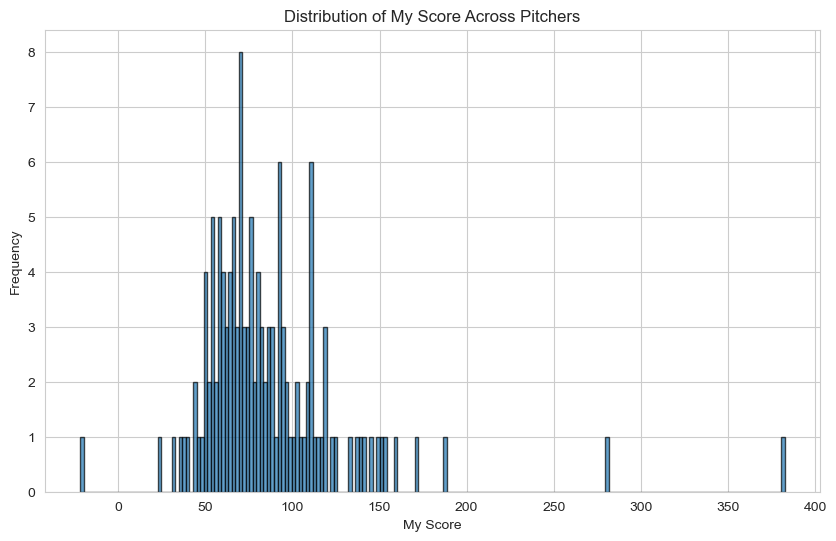

In [68]:
plt.figure(figsize=(10, 6))
plt.hist(average_score_by_pitcher['my_score'], bins=200, edgecolor='k', alpha=0.7)
plt.xlabel('My Score')
plt.ylabel('Frequency')
plt.title('Distribution of My Score Across Pitchers')
plt.show()

## Trying to compare my score against ERA and other relevant metrics

In [ ]:
# !pip install pybaseball

In [ ]:
from pybaseball import pitching_stats

# Retrieve pitching stats for 2021 to 2023
data = pitching_stats(2021, 2023)
# Filter for desired columns
era_data = data[['Season', 'Name', 'Team', 'ERA']]

In [ ]:
era_data

In [ ]:
# Calculating the overall average ERA for each pitcher across all seasons
overall_average_era = era_data.groupby('Name')['ERA'].mean().reset_index()

overall_average_era

In [ ]:
# Adjusting the names in average_score_by_pitcher to match the format in overall_average_era

# Function to reformat "Lastname, Firstname" to "Firstname Lastname"
def reformat_name(name):
    last, first = name.split(', ')
    return f"{first} {last}"

# Applying the reformatting function
average_score_by_pitcher['Name'] = average_score_by_pitcher['pitcher'].apply(reformat_name)

# Merging the dataframes on the reformatted name column
merged_data = overall_average_era.merge(average_score_by_pitcher, on="Name")

# Plotting the ERA vs. my_score for each pitcher
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['ERA'], merged_data['my_score'], color='blue', alpha=0.7)

# Adding labels and title
plt.xlabel("Average ERA")
plt.ylabel("Average My Score")
plt.title("Comparison of Average ERA and Average My Score by Pitcher")
plt.grid(True)

# Displaying the plot
plt.show()

In [ ]:
merged_data

In [ ]:
# Calculate the Pearson correlation coefficient between ERA and my_score
correlation = merged_data['ERA'].corr(merged_data['my_score'])
print("Correlation between ERA and my_score:", correlation)

In [ ]:
# Filter data to include only rows where my_score is between -20 and 20
subset_data = merged_data[(merged_data['my_score'] >= 50) & (merged_data['my_score'] <= 90)]

# Calculate the correlation for the filtered subset
subset_correlation = subset_data['ERA'].corr(subset_data['my_score'])
print("Correlation between ERA and my_score in [-20, 20]:", subset_correlation)

# Calculate the correlation for the full dataset for comparison
full_correlation = merged_data['ERA'].corr(merged_data['my_score'])
print("Correlation between ERA and my_score for all data:", full_correlation)


In [ ]:
# Plotting the ERA vs. my_score for the filtered range
plt.figure(figsize=(10, 6))
plt.scatter(subset_data['ERA'], subset_data['my_score'], color='green', alpha=0.7)

# Adding labels and title
plt.xlabel("Average ERA")
plt.ylabel("Average My Score")
plt.title("Comparison of Average ERA and My Score by Pitcher (My Score between -20 and 20)")
plt.grid(True)

# Displaying the plot
plt.show()
